## Credit Card Fraud Detection

Aim is to predict fraudulent credit card transactions with the help of Machine learning models

### Models build to identify Credit card fraud transactions

1. Models on Imbalanced dataset
    - 1.1 Logistic Regression
    - 1.2 Decision Tress
    - 1.3 Random Forest
    - 1.4 XGBoost
    - 1.5 SVC
2. Models on RandomOverSampling dataset
    - 2.1 Logistic Regression
    - 2.2 Decision Tress
    - 2.3 Random Forest
    - 2.4 XGBoost
3. Models on SMOTE dataset
    - 3.1 Logistic Regression
    - 3.2 Decision Tress
    - 3.3 Random Forest
    - 3.4 XGBoost
4. Models on ADASYN dataset
    - 4.1 Logistic Regression
    - 4.2 Decision Tress
    - 4.3 Random Forest
    - 4.4 XGBoost

In [1]:
# Importing all required basic packages
import numpy as np
import pandas as pd
from datetime import date
import re
import sys
import itertools
from IPython.display import Markdown, display ,HTML

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing sklearn modules
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,StratifiedKFold,train_test_split,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics,model_selection
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix,average_precision_score

# Importing packages for visualization
from IPython.display import Image  
#from sklearn.externals.six import StringIO 

from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import PowerTransformer

In [4]:
# For display of all rows and columns
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Exploratory data analysis

In [5]:
CreditCard_df = pd.read_csv('creditcard.csv')
CreditCard_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [6]:
# Observe the different feature type present in the data
CreditCard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Printing the size, number of rows and number of columns in the Creditcard dataset
print("Size of the Creditcard fraud dataset: ",CreditCard_df.shape)
print("No of rowns in Creditcard fraud dataset: ",CreditCard_df.shape[0])
print("No of columns in Creditcard fraud dataset: ",CreditCard_df.shape[1])

Size of the Creditcard fraud dataset:  (284807, 31)
No of rowns in Creditcard fraud dataset:  284807
No of columns in Creditcard fraud dataset:  31


In [8]:
# Printing the datatypes of the columns present in the Creditcard fraud dataset
CreditCard_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
# Missing percentage values of the columns in the dataset
missing_count=100*(CreditCard_df.isnull().sum()/CreditCard_df.shape[0])
missing_count=missing_count[missing_count>0]
print("No of columns having missing values: ",len(missing_count))
print(missing_count.sort_values(ascending=False))

No of columns having missing values:  0
Series([], dtype: float64)


In [10]:
# Checking for duplicate rows
CreditCard_df[CreditCard_df.duplicated()]

Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9       V10       V11       V12       V13  \
33      0.711206  0.176066 -0.286717 -0.484688  0.872490  0.851636 -0.571745   
35      0.693039  0.179742 -0.285642 -0.482474  0.871800  0.853447 -0.571822   
113    -0.036715  0.350995  0.118950 -0.243289  0.578063  0.674730 -0.534231   
114    -0.036715  0.350995  0.118950 -0.243289  0.578063  0.674730 -0.534231   
115    -0.036715  0.350995  0.118950 -0.243289  0.578063  0.674730 -0.534231   
...          ...       ...       ...       ...       ...       ...       ...   
282987 -0.881302  1.081750  1.022928  0.005356 -0.541998  0.745036 -0.375165   
283483 -0.303778  0.884953  0.054065 -0.828015 -1.192581  0.944989  1.372532   
283485 -0.282535  0.880654  0.052808 -0.830603 -1.191774  0.942870  1.372621   
284191 -0.667233  2.309700 -1.639306 -1.449823 -0.508930  0.600035 -0.627313   
284193 -0.745886  2.325616 -1.634651 -1.440241 -0.511918  0.607878 -0.627645   

             V14       V15       V16       V17       V18       V19       V20  \
33      0.100974 -1.519772 -0.284376 -0.310524 -0.404248 -0.823374 -0.290348   
35      0.102252 -1.519991 -0.285912 -0.309633 -0.403902 -0.823743 -0.283264   
113     0.446601  1.122885 -1.768001  1.241157 -2.449500 -1.747255 -0.335520   
114     0.446601  1.122885 -1.768001  1.241157 -2.449500 -1.747255 -0.335520   
115     0.446601  1.122885 -1.768001  1.241157 -2.449500 -1.747255 -0.335520   
...          ...       ...       ...       ...       ...       ...       ...   
282987 -0.068227 -0.795939 -0.497901 -0.134224 -1.004958  0.086074 -0.207620   
283483 -0.036493 -0.208747  0.320086 -0.204910 -0.024821 -0.468859  0.031950   
283485 -0.037988 -0.208490  0.321883 -0.205951 -0.025225 -0.468427  0.023667   
284191  1.017499 -0.887384  0.420096  1.856497  1.315099  1.096112 -0.821707   
284193  1.023032 -0.888334  0.413444  1.860351  1.316597  1.094512 -0.791037   

             V21       V22       V23       V24       V25       V26       V27  \
33      0.046949  0.208105 -0.185548  0.001031  0.098816 -0.552904 -0.073288   
35      0.049526  0.206537 -0.187108  0.000753  0.098117 -0.553471 -0.078306   
113     0.102520  0.605089  0.023092 -0.626463  0.479120 -0.166937  0.081247   
114     0.102520  0.605089  0.023092 -0.626463  0.479120 -0.166937  0.081247   
115     0.102520  0.605089  0.023092 -0.626463  0.479120 -0.166937  0.081247   
...          ...       ...       ...       ...       ...       ...       ...   
282987 -0.524067 -1.337510  0.473943  0.616683 -0.283548 -1.084843  0.073133   
283483  0.287217  0.947825 -0.218773  0.082926  0.044127  0.639270  0.213565   
283485  0.284205  0.949659 -0.216949  0.083250  0.044944  0.639933  0.219432   
284191  0.391483  0.266536 -0.079853 -0.096395  0.086719 -0.451128 -1.183743   
284193  0.402639  0.259746 -0.086606 -0.097597  0.083693 -0.453584 -1.205466   

             V28  Amount  Class  
33      0.023307    6.14      0  
35      0.025427    1.77      0  
113     0.001192    1.18      0  
114     0.001192    1.18      0 

#### There are 1081 duplicate records found, since the given data is PCA transformed data interpreting these rows is difficult. Since, these records are few and they belong to class 0 dropping these records.

In [11]:
# Removing duplicates from the dataset
CreditCard_df.drop_duplicates(keep='first',inplace=True)

# Verifying duplicate records exist or not
CreditCard_df[CreditCard_df.duplicated()]

Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

Duplicate records are successfully removed from the dataset

In [12]:
# Describe function to understand numerical features
CreditCard_df.describe()

Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.689830      -0.769031      -0.552509   
50%        -0.022248      -0.053468      -0.275168       0.040859   
75%         0.739647       0.612218       0.396792       0.570474   
max        16.875344      34.801666      73.301626     120.589494   

                  V8             V9            V10            V11  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.000854      -0.001596      -0.001441       0.000202   
std         1.179054       1.095492       1.076407       1.018720   
min       -73.216718     -13.434066     -24.588262      -4.797473   
25%        -0.208828      -0.644221      -0.535578      -0.761649   
50%         0.021898      -0.052596      -0.093237      -0.032306   
75%         0.325704       0.595977       0.453619       0.739579   
max        20.007208      15.594995      23.745136      12.018913   

                 V12            V13            V14            V15  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.000715       0.000603       0.000252       0.001043   
std         0.994674       0.995430       0.952215       0.914894   
min       -18.683715      -5.791881     -19.214325      -4.498945   
25%        -0.406198      -0.647862      -0.425732      -0.581452   
50%         0.139072      -0.012927       0.050209       0.049299   
75%         0.616976       0.663178       0.492336       0.650104   
max         7.848392       7.126883      10.526766       8.877742   

                 V16            V17            V18            V19  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.001162       0.000170       0.001515      -0.000264   
std         0.873696       0.842507       0.837378       0.813379   
min       -14.129855     -25.162799      -9.498746      -7.213527   
25%        -0.466860      -0.483928      -0.498014      -0.456289   
50%         0.067119      -0.065867      -0.002142       0.003367   
75%         0.523512       0.398972       0.501956       0.458508   
max        17.315112       9.253526       5.041069       5.591971   

                 V20            V21            V22            V23  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000187      -0.000371      -0.000015       0.000198   
std         0.769984       0.723909       0.724550       0.623702   
min       -54.497720     -34.830382     -10.933144     -44.807735   
25%        -0.211469      -0.228305      -0.542700      -0.161703   
50%        -0.062353      -0.029441       0.006675      -0.011159   
75%         0.133207       0.186194       0.528245       0.147748   
max        39.420904      27.202839      10.503090      22.528412   

                 V24            V25            V26            V27  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000214      -0.000232       0.000149       0.001763   
std         0.605627       0.521220       0.482053       0.395744   
min     

### Distribution of classes

In [13]:
classes=CreditCard_df['Class'].value_counts()
normal_class=classes[0]/CreditCard_df['Class'].count()*100
fraud_class=classes[1]/CreditCard_df['Class'].count()*100

In [14]:
print("Normal Class: ",normal_class)
print("Fraud Class: ",fraud_class)

Normal Class:  99.83328986416473
Fraud Class:  0.1667101358352777


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Class 0 and 1')]

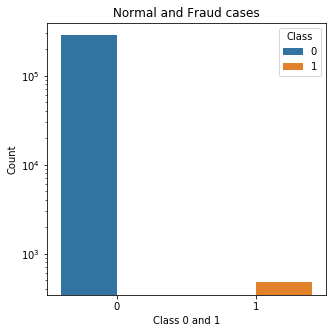

In [15]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
# Figure Size 
plt.rcParams["figure.figsize"] = [5,5]
ax=sns.countplot(x='Class',data=CreditCard_df,hue="Class");
ax.set_yscale('log')
ax.set_title('Normal and Fraud cases')
ax.set(xlabel = 'Class 0 and 1', ylabel = 'Count')

The fraud classes are very less when compared to the normal class. We can understand the distribution of these clases with respect to time and amount

In [16]:
# Dividing dataframe based on fraud transanctions 
CreditCard_Fraud = CreditCard_df[CreditCard_df['Class']==1]
CreditCard_Normal = CreditCard_df[CreditCard_df['Class']==0]

In [17]:
# Describe for fraud transactions numericals
CreditCard_Fraud.describe

<bound method NDFrame.describe of             Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

     

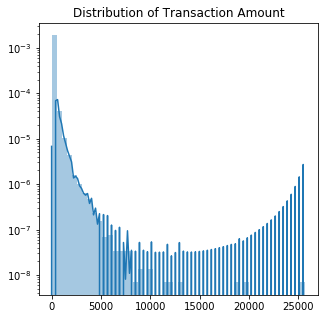

In [18]:
# Distributions of Amount for each transactions
amount = CreditCard_df['Amount'].values
ax=sns.distplot(amount)
ax.set_title('Distribution of Transaction Amount')
plt.yscale('log')
plt.show()

The distribution of amount for all the transactions is in between 88 to 25000 approximately

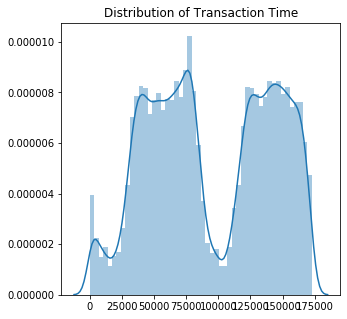

In [19]:
# Distributions of  Time for each transactions

time = CreditCard_df['Time'].values
ax=sns.distplot(time)
ax.set_title('Distribution of Transaction Time')
plt.show()

We can see there are some spikes showing the distribution of time beween transactions is not uniform

Text(0, 0.5, 'Number of Transactions')

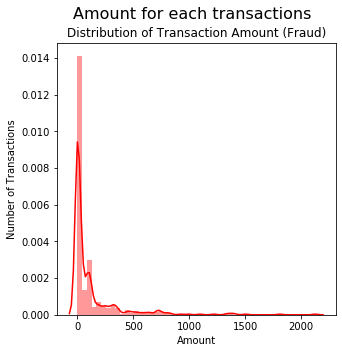

In [20]:
# Create a plot to observe the distribution of classes with Amount
# For fraud transactions

fig = plt.figure(figsize = (5,5))
ax=sns.distplot(CreditCard_Fraud['Amount'], color="red")
# Title
fig.suptitle('Amount for each transactions', fontsize=16)
ax.set_title('Distribution of Transaction Amount (Fraud)')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')

We can observe the max amount for fradulent transactions is 2125

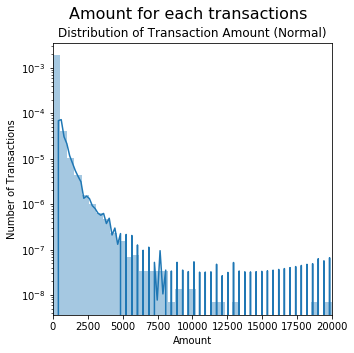

In [21]:
# Create a plot to observe the distribution of classes with Amount
# For Normal transactions

fig = plt.figure(figsize = (5,5))
ax=sns.distplot(CreditCard_Normal['Amount'])

# Title
fig.suptitle('Amount for each transactions', fontsize=16)
ax.set_title('Distribution of Transaction Amount (Normal)')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')

Text(0, 0.5, 'Number of Transactions')

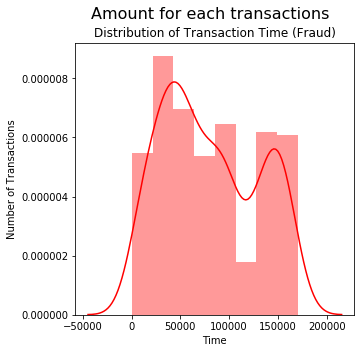

In [22]:
# Create a plot to observe the distribution of classes with Time
# For fraud transactions

fig = plt.figure(figsize = (5,5))
ax=sns.distplot(CreditCard_Fraud['Time'], color="red")
# Title
fig.suptitle('Amount for each transactions', fontsize=16)
ax.set_title('Distribution of Transaction Time (Fraud)')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')

(0, 200000)

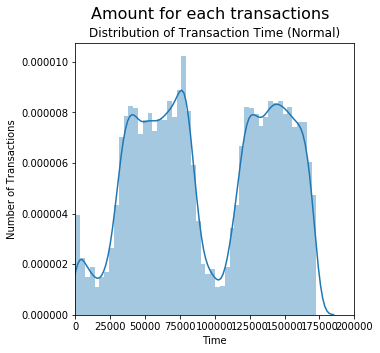

In [23]:
# Create a plot to observe the distribution of classes with Time
# For Normal transactions

fig = plt.figure(figsize = (5,5))
ax=sns.distplot(CreditCard_Normal['Time'])

# Title
fig.suptitle('Amount for each transactions', fontsize=16)
ax.set_title('Distribution of Transaction Time (Normal)')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.xlim((0, 200000))

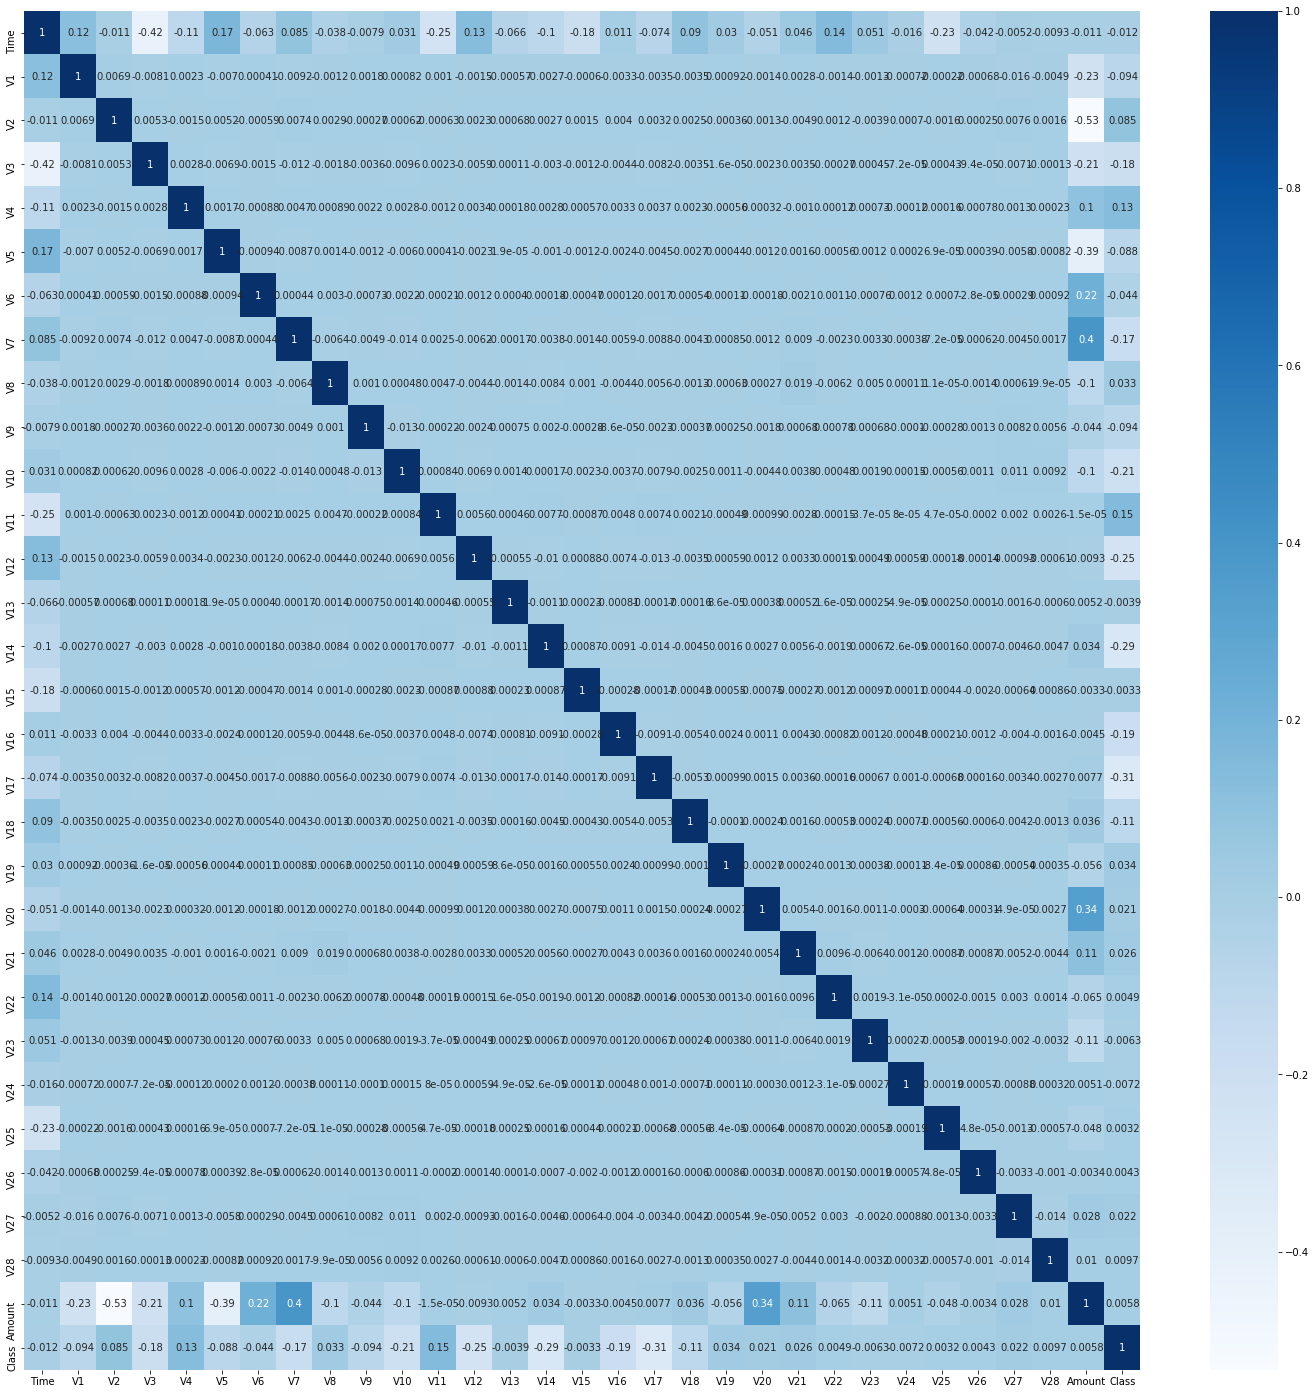

In [24]:
# Heatmap for rechatge related columns to check for the multi collinearity
plt.figure(figsize=(25,25))
sns.heatmap(CreditCard_df.corr(),cmap="Blues",annot=True)
plt.show()

In [25]:
# Droping  Time feature as it is unnecessary for modelling
CreditCard_df.drop('Time', axis=1, inplace=True)

### Splitting the data into train & test data

In [26]:
# Storing all dependent variables to X
X = CreditCard_df.drop('Class',axis=1)

# Storing the target variable in y
y = CreditCard_df['Class']

In [27]:
# Splitting into X train, y train, x test and y test in the ratio of 70:30 using stratified technique
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100,stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [28]:
print("Number of fraud cases in the creditcard dataset     : ",np.sum(y))
print("Number of fraud cases in the creditcard Training set: ",np.sum(y_train))
print("Number of fraud cases in the creditcard Test set    : ",np.sum(y_test))

Number of fraud cases in the creditcard dataset     :  473
Number of fraud cases in the creditcard Training set:  331
Number of fraud cases in the creditcard Test set    :  142


### Scaling of the data

In [29]:
# # Using Standard scaler to standardise the Amount data..
scaler = StandardScaler()

X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))

# Transforming to test data
X_test['Amount']=scaler.transform(X_test['Amount'].values.reshape(-1,1))


In [30]:
# The first few rows to understand the data
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
264951  2.108108 -0.207740 -3.386067 -0.720760  2.905339  2.932171  0.054796   
133470 -1.649337  1.618734  0.778147  1.499991 -0.671305 -0.324744 -0.003352   
42081  -0.988915 -0.574157  1.781496  1.385101 -1.520115  0.862465  1.666281   
96180   1.243011 -1.158591  1.746183  0.070202 -2.267166  0.021526 -1.526797   
30227  -2.732594 -3.390003  1.905871  2.370883  1.576106 -0.829620 -1.574918   

              V8        V9       V10       V11       V12       V13       V14  \
264951  0.562129  0.017654  0.190507 -0.079089  0.232614 -0.366430  0.797040   
133470  0.728000 -0.615472 -0.258803 -0.224528  1.238026  0.983642  0.363120   
42081  -0.014001  0.204247 -0.475849  0.502896 -0.089572 -1.976272 -0.084782   
96180   0.264856  0.898678  0.270704 -1.411092  0.057475 -0.939394 -1.057063   
30227   0.720360  0.490409 -0.048365  0.685676  0.350300 -1.770328  0.260913   

             V15       V16       V17       V18       V19       V20       V21  \
264951  0.085960 -0.721847 -0.169346 -0.895393  0.002128 -0.174293  0.095248   
133470  0.025482 -1.194688  1.076367 -0.942963  0.514012 -0.125627  0.130663   
42081  -1.251321 -0.729079  0.221598  0.599054  1.120696  0.815315  0.219437   
96180  -1.612449 -2.049695  0.945427  0.704737 -0.211953 -0.580521 -0.538005   
30227  -0.389853 -0.744565  0.519826  0.362489  0.866644  1.178100  0.444896   

             V22       V23       V24       V25       V26       V27       V28  \
264951  0.367526  0.010535  0.784185  0.412944  0.734475 -0.093999 -0.091945   
133470  0.406602 -0.120376  0.659741 -0.144796 -0.296584 -0.167095  0.014489   
42081   0.334773  0.687217  0.483754  0.027905 -0.328834 -0.131395 -0.066885   
96180  -0.647409  0.126347  0.762970  0.066970  1.056949  0.019855  0.022691   
30227   0.183814  1.267736  0.150142 -0.840633 -0.461230  0.093656  0.283742   

          Amount  
264951 -0.368343  
133470 -0.256661  
42081   1.342579  
96180  -0.329180  
30227   0.676130

### Plotting the distribution of a variable

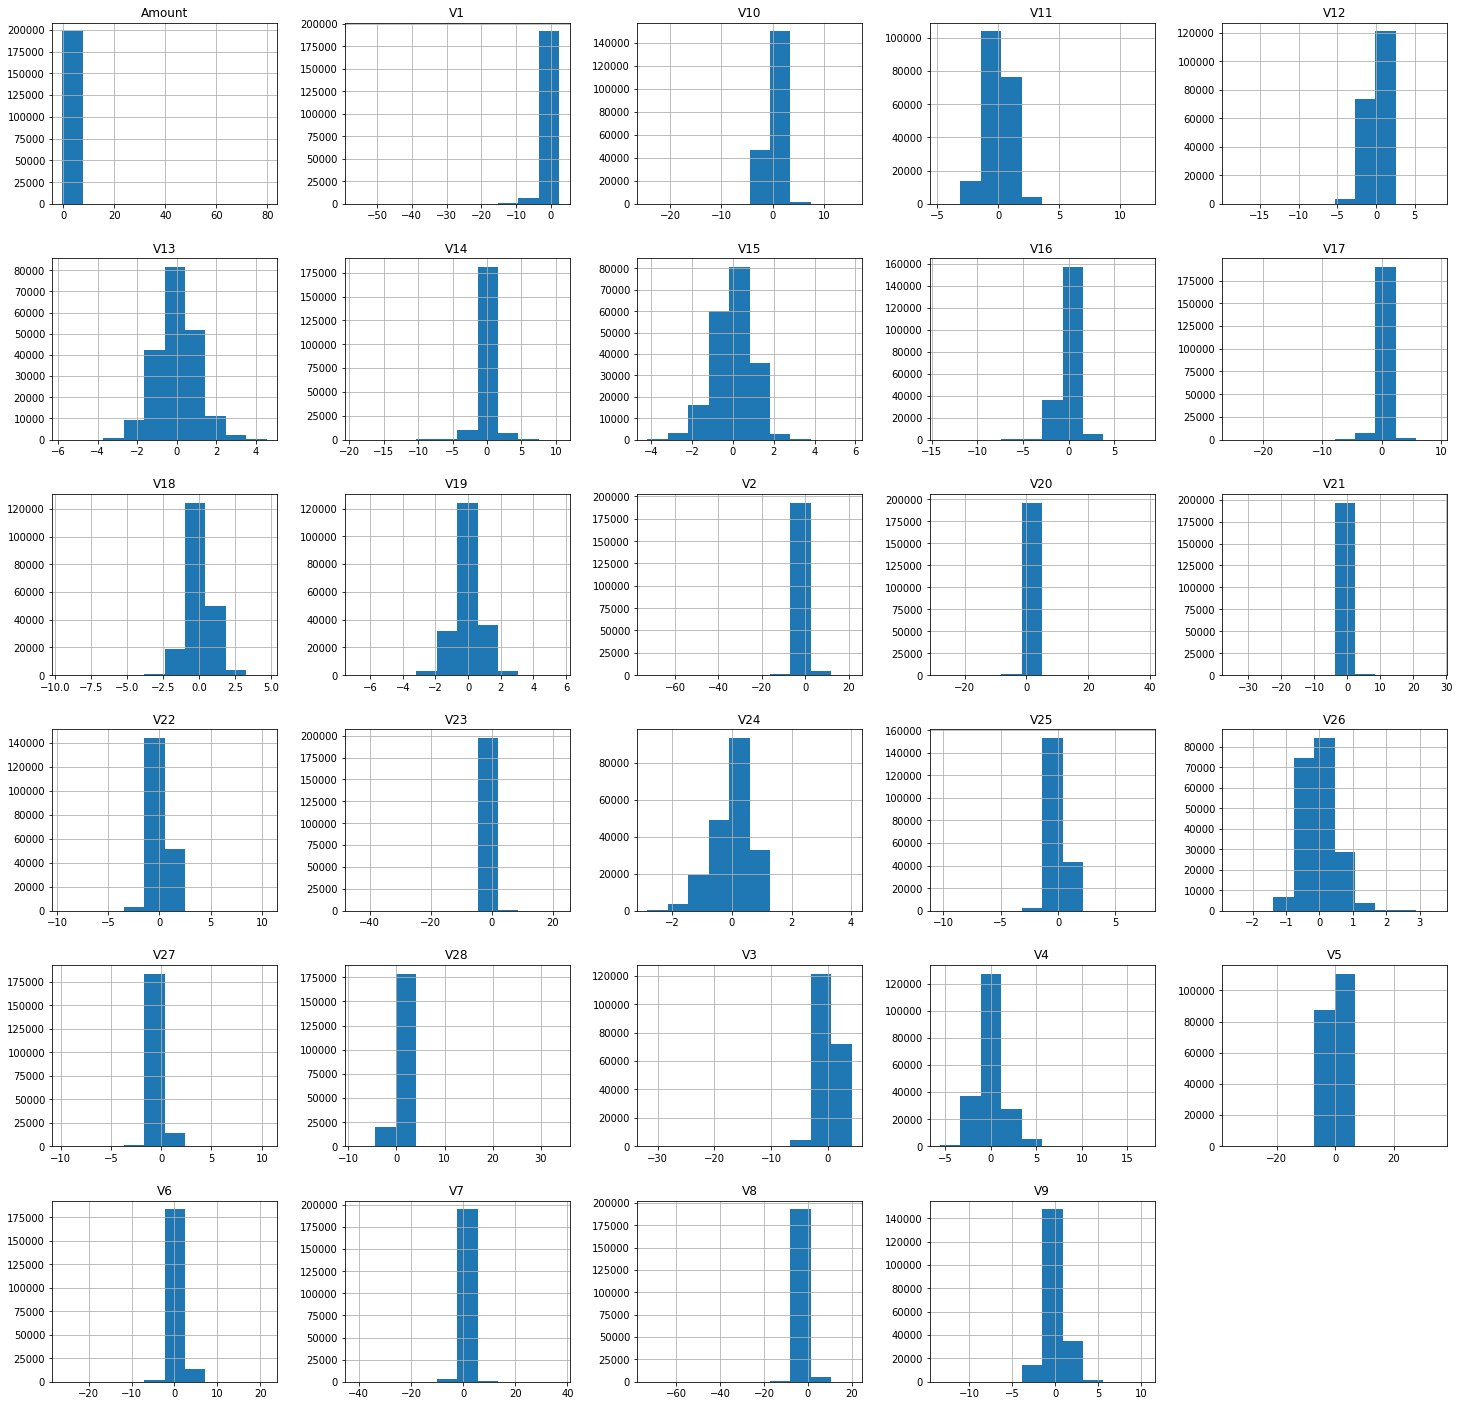

In [31]:
# plot the histogram of a variable from the dataset to see the skewness
X_train.hist(figsize = (25,25))
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [32]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=True)
dX_train_transform=pt.fit_transform(X_train)
dx_test_transform=pt.transform(X_test)

In [33]:
# Converting power transformed dataset into dataframe
X_train=pd.DataFrame(data=dX_train_transform,columns=X_train.columns)
X_test=pd.DataFrame(data=dx_test_transform,columns=X_test.columns)

In [34]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
0  1.500327 -0.218435 -1.930901 -0.464848  2.115108  1.971950  0.032373   
1 -1.020546  1.116958  0.456492  1.060979 -0.493932 -0.161053 -0.016329   
2 -0.755943 -0.442656  1.387530  0.990619 -1.125304  0.730275  1.417588   
3  0.670961 -0.778313  1.352518  0.130015 -1.683606  0.123547 -1.259926   
4 -1.393314 -1.917674  1.512016  1.577661  1.153101 -0.612476 -1.298486   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.519346  0.070681  0.222355 -0.031146  0.096598 -0.357860  0.865549   
1  0.709253 -0.533319 -0.203547 -0.177182  1.588299  0.990088  0.334200   
2 -0.091265  0.239482 -0.417674  0.529155 -0.273717 -2.012798 -0.169447   
3  0.194007  0.837987  0.295824 -1.439196 -0.112058 -0.942442 -1.115938   
4  0.700383  0.491064 -0.000921  0.698712  0.246164 -1.799172  0.214861   

        V15       V16       V17       V18       V19       V20       V21  \
0  0.035840 -0.864086 -0.239330 -1.064486  0.016007 -0.235924  0.148868   
1 -0.031203 -1.324745  1.343458 -1.118649  0.640816 -0.171324  0.198122   
2 -1.327794 -0.871375  0.233813  0.704694  1.372103  1.088838  0.321048   
3 -1.667164 -2.094037  1.168068  0.835358 -0.248157 -0.773112 -0.753170   
4 -0.474547 -0.886954  0.610796  0.414502  1.066875  1.579020  0.630128   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.494873  0.004740  1.415944  0.783326  1.443072 -0.268090 -0.279898   
1  0.550084 -0.206407  1.151606 -0.316310 -0.575350 -0.456017  0.059072   
2  0.448671  1.129316  0.791976  0.013179 -0.653409 -0.364469 -0.199586   
3 -0.900880  0.193478  1.370311  0.089150  1.942680  0.028603  0.084956   
4  0.236656  2.127455  0.159756 -1.563045 -0.983537  0.223666  0.892850   

     Amount  
0 -1.054229  
1 -0.225439  
2  1.952268  
3 -0.735604  
4  1.766984

In [35]:
#The X_train and X_test split indices are resetted so we have to align the same on y_train ,y_test
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

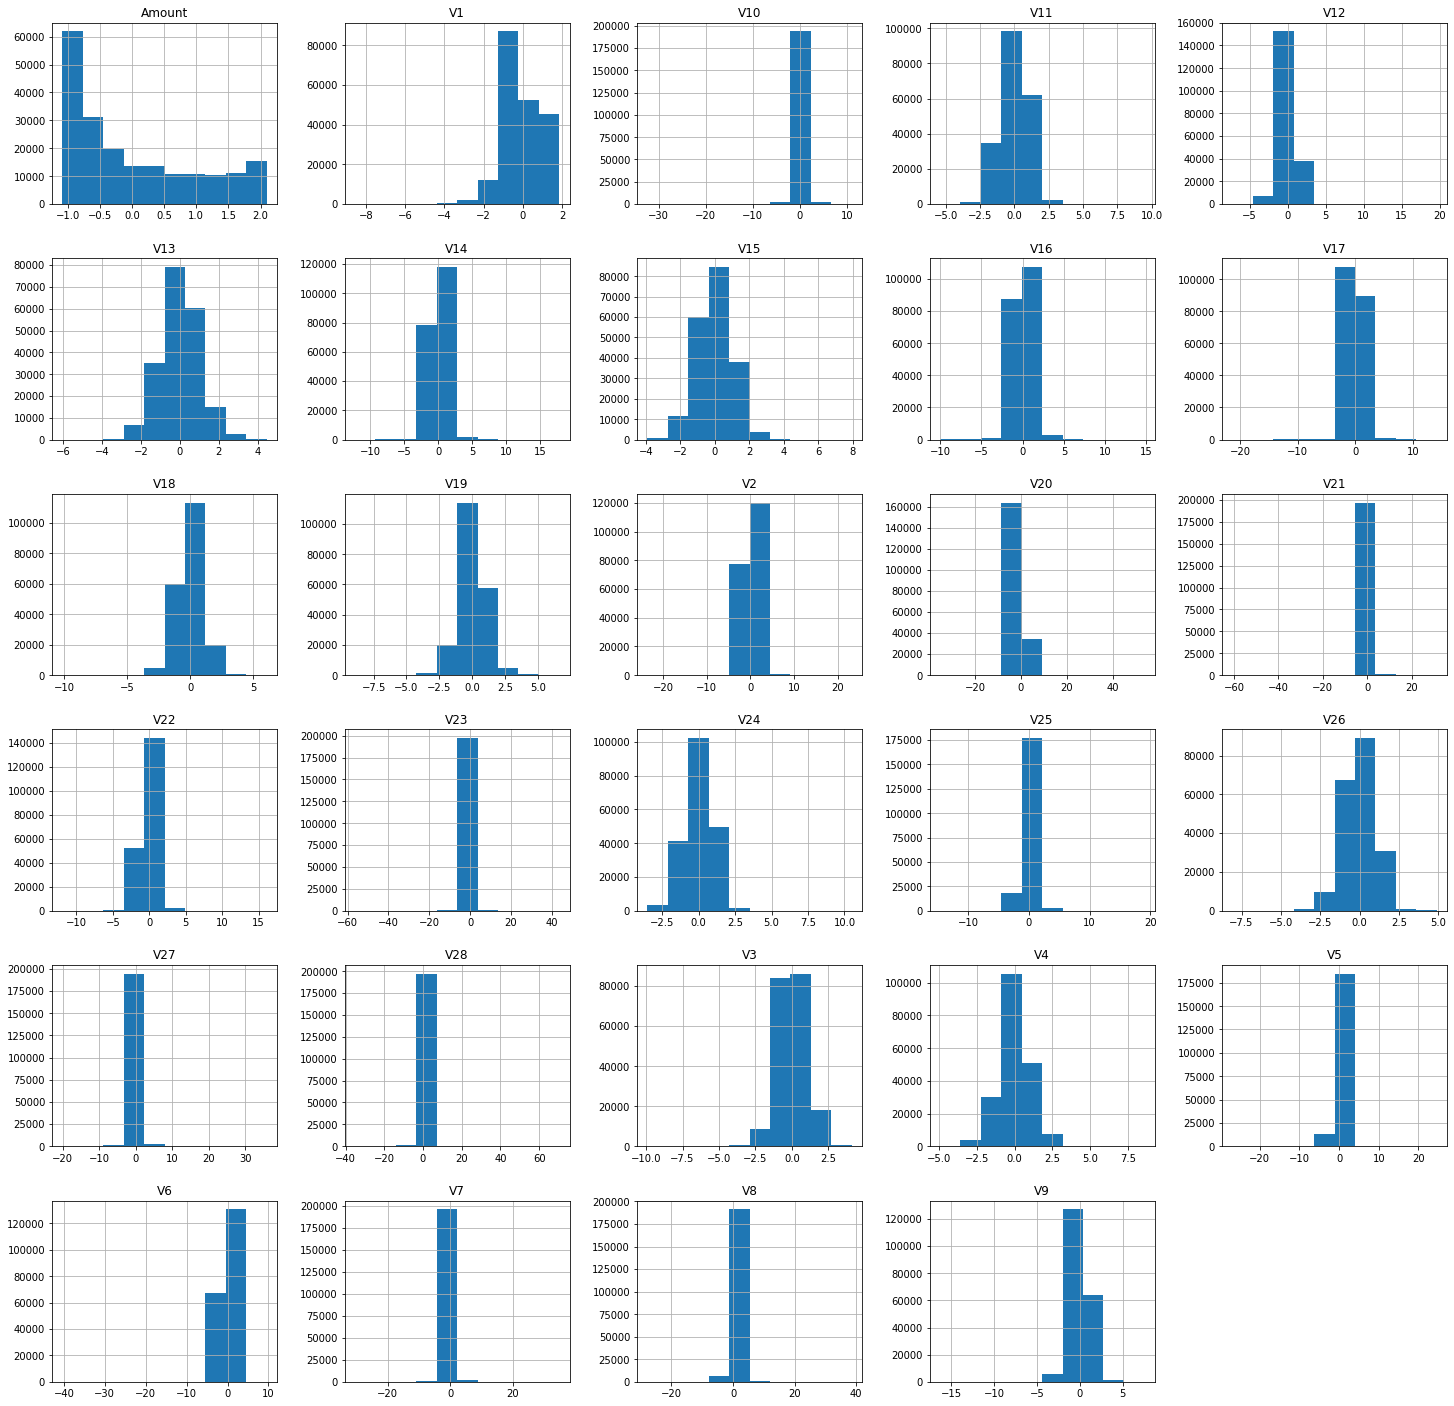

In [36]:
# plot the histogram of a variable from the dataset again to see the result 
X_train.hist(figsize = (25,25))
plt.show()

Insight: After performing power transform we can see the distribution to be normal

### Functions used for model building

In [37]:
#To track and view the metrics for all the models built
consolidate_summary = pd.DataFrame()

In [38]:
#To find the optimal threshold values for sensitivity,specificity,accuracy
def probability_cutoffs(model,X_train,y_train):
    y_train_pred = model.predict_proba(X_train)
    y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Fraud_Prob':y_train_pred[:,1]})
    y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
    
    #Finding Optimal Cutoff Point, the prob where we get balanced sensitivity and specificity
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
    y_train_pred_final.head()
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
    
    from sklearn.metrics import confusion_matrix
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    print(cutoff_df)

    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults()
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
    plt.show()

In [39]:
#Once the optimal threshold is found imputing that threshold value to the dataset
def Tuning_Threshold(model,X_train,y_train,X_test,y_test,threshold_value):

    train_pred_y=pd.DataFrame()
    train_pred_y['train_proba']=model.predict_proba(X_train)[:,1]
    train_pred_y['train_pred']=train_pred_y['train_proba'].map( lambda x: 1 if x > threshold_value else 0)
    print('For Training Data:\n')
    print(classification_report(y_train, train_pred_y['train_pred']),'\n')
    print(confusion_matrix(y_train, train_pred_y['train_pred']))

    print('\n')

    test_pred_y=pd.DataFrame()
    test_pred_y['test_proba']=model.predict_proba(X_test)[:,1]
    test_pred_y['test_pred']=test_pred_y['test_proba'].map( lambda x: 1 if x > threshold_value else 0)
    print('For Testing Data:\n')
    print(classification_report(y_test, test_pred_y['test_pred']),'\n')
    print(confusion_matrix(y_test, test_pred_y['test_pred']))
    return train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred']

In [40]:
#This function is to draw ROC curve for training and testing dataset
def draw_roc( X,actual, probs ):

    plt.rcdefaults()
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    print(X)
    print("The ROC_AUC_Score: ",auc_score)
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [41]:
# Printing the header 
def header(string):
    display(Markdown("------ "))
    display(Markdown("### "+string))

#Evaluating the metrics precisoon, recall,accuracy and roc score    
def print_model_metrics(y_test,y_pred,y_test_prob,model_name):
    header(model_name+" Model Stats Scores Summary : ")
    from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score
    accuracy = round(accuracy_score(y_test,y_pred),2)
    #precision=round(precision_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    auc = round(roc_auc_score(y_test,y_test_prob),2)
    data = [[model_name,accuracy,recall,auc]] 
    df = pd.DataFrame(data, columns = ['Model','Accuracy','Recall','AUC'])
    add_to_global_summary(df)
    return df 

def add_to_global_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)

## Model Building
Building models as functions as we use them on imbalanced and Balanced data

#### Function for Logistic 

In [42]:
# Building Logistic Regression function
def Logistic_Regression(X_train,y_train,dataset):
    # Logistic Regression Model
    LR=  LogisticRegression(solver='liblinear',max_iter=200,random_state=42)

    # Create hyperparameter options
    hyperparameters = dict(C=np.logspace(0,4, 10), penalty=['l1','l2'])

    # Finding best hyper parameters using Randomized search
    best_model = RandomizedSearchCV(LR, hyperparameters, cv=folds, scoring=('roc_auc'),random_state=42)

    # Fit grid search
    LR = best_model.fit(X_train,y_train)
    print("Best parameters found for Logistic Regression with",dataset,": " ,LR.best_params_)
    return LR

#### Function for Decision Tree

In [43]:
# Building Descision tree function
def Decision_tree(X_train,y_train,dataset):
    # Defining the decision tree with 
    DT = DecisionTreeClassifier(random_state=42)

    # Create the parameter grid 
    param_grid = {
        'max_depth': [3,5,7,9,11],
        'min_samples_leaf': [1,3,5,7,9],
        'min_samples_split': [1,3,5,7,9],
        'criterion': ["entropy", "gini"]
    }

    best_model = RandomizedSearchCV(DT,param_grid,cv = folds, verbose = 1, scoring='roc_auc', n_jobs = -1, return_train_score=True)

    # Fit the grid search to the data
    best_model.fit(X_train,y_train)

    # printing the optimal accuracy score and hyperparameters
    print("Best accuracy on ",dataset," = ", best_model.best_score_)
    print("Best parameters : ",best_model.best_estimator_ )

    # model with optimal hyperparameters
    DT = best_model.best_estimator_
    DT.fit(X_train, y_train)
    return DT


In [44]:
# Definition to visualize the Decision Tree
def Decision_tree_visual(model,y):
    from sklearn.tree import plot_tree
    import matplotlib.pyplot as plt
    plt.figure(figsize=(25,10))
    a=plot_tree(model,
                feature_names=X_train.columns.tolist(),
                class_names=y.values.astype('str'),
                filled=True,
                rounded=True)

#### Function for Random Forest

In [45]:
# Building Random Forest function
def Random_Forest(X_train,y_train,dataset):
    # Running the random forest with default parameters.
    RF = RandomForestClassifier(random_state=42,warm_start=True,oob_score=True)

    # Create the parameter grid 
    hyperparameters = {
        'max_depth': [3,5,7,9,11],
        'min_samples_leaf': [1,3,5,7,9],
        'min_samples_split': [1,3,5,7,9],
        'criterion': ["entropy", "gini"],
        'n_estimators': [20]
    }

    best_model = RandomizedSearchCV(RF, hyperparameters, n_iter = 10, cv = folds,verbose = 1, scoring='roc_auc', n_jobs = -1)
    best_model.fit(X_train,y_train)

    # printing the optimal accuracy score and hyperparameters
    print("Best accuracy on ",dataset,"= ", best_model.best_score_)
    print("Best parameters : ",best_model.best_estimator_ )

    # model with optimal hyperparameters
    RF = best_model.best_estimator_
    RF.fit(X_train, y_train)
    return RF

#### Function for XGBoost

In [46]:
# Building XGBoost function
def XGBoost_classifier(X_train,y_train,dataset):
    # Defining the XG Boost classifier
    XG = XGBClassifier(verbosity=0,random_state=42)

    # Defining hyper parameters for the XG boost model
    max_depth_num = np.logspace(0, 4, 10) 
    booster = ['gbtree', 'gblinear', 'dart']
    gain_type=["gain", "weight", "cover", "total_gain" , "total_cover"]

    #perform hyperparameter tuning
    Hyperparameters = dict(max_depth=max_depth_num,booster=booster,importance_type=gain_type)

    best_model = RandomizedSearchCV(XG, Hyperparameters, random_state=42,scoring=('roc_auc'),cv=folds,verbose=1)
    best_model.fit(X_train,y_train)

    # printing the optimal accuracy score and hyperparameters
    print("Best accuracy on ",dataset,"= ", best_model.best_score_)
    print("Best parameters : ",best_model.best_estimator_ )

    # model with optimal hyperparameters
    XGB = best_model.best_estimator_
    XGB.fit(X_train, y_train)
    return XGB

#### Function for SVC

In [47]:
def SVClassifier(X_train,y_train,dataset):
    from sklearn.svm import SVC
    svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
    svc = RandomizedSearchCV(SVC(), svc_params,scoring='roc_auc',cv = folds)
    svc.fit(X_train, y_train)
    return svc

#### Cross validation check

In [48]:
def cross_validate(model,X,y):
    from sklearn.model_selection import cross_validate
    cv_results = cross_validate(model, X, y,scoring=('roc_auc','recall','precision','f1','accuracy'))
    sorted(cv_results.keys())
    print(pd.DataFrame(cv_results))
    print('\n')
    print('Avg. values are:\n')
    print('\n')
    print(pd.DataFrame(cv_results).mean())
    

### 1.Imbalanced Dataset

In [49]:
# Perform stratified cross validation
# list of values
cv_num =  3
# Create grid search using 3 fold cross validation
folds = StratifiedKFold(n_splits = cv_num, shuffle = True, random_state = 42)

# enumerate the splits and summarize the distributions
count=1
for train_ix, test_ix in folds.split(X_train,y_train):
    # select rows
    print('Fold Number:',count)
    print("Train values: ",'\n',train_ix)
    print("Test values: ",'\n',test_ix)
    X_train_cv, X_test_cv = X_train.iloc[list(train_ix)], X_train.iloc[list(test_ix)]
    y_train_cv, y_test_cv = y_train.iloc[list(train_ix)], y_train.iloc[list(test_ix)]
    # summarize train and test composition
    train_0, train_1 = len(y_train_cv[y_train_cv==0]), len(y_train_cv[y_train_cv==1])
    test_0, test_1 = len(y_test_cv[y_test_cv==0]), len(y_test_cv[y_test_cv==1])
    print('>Split of labels on Train: Class 0 = %d, Class 1 = %d, \n Split of labels on Test: Class 0 = %d, Class 1 = %d' % (train_0, train_1, test_0, test_1))
    print('\n')
    count+=1

Fold Number: 1
Train values:  
 [     5      7      8 ... 198605 198606 198607]
Test values:  
 [     0      1      2 ... 198592 198593 198601]
>Split of labels on Train: Class 0 = 132184, Class 1 = 221, 
 Split of labels on Test: Class 0 = 66093, Class 1 = 110


Fold Number: 2
Train values:  
 [     0      1      2 ... 198600 198601 198606]
Test values:  
 [     5      7      8 ... 198604 198605 198607]
>Split of labels on Train: Class 0 = 132185, Class 1 = 220, 
 Split of labels on Test: Class 0 = 66092, Class 1 = 111


Fold Number: 3
Train values:  
 [     0      1      2 ... 198604 198605 198607]
Test values:  
 [    13     19     28 ... 198599 198600 198606]
>Split of labels on Train: Class 0 = 132185, Class 1 = 221, 
 Split of labels on Test: Class 0 = 66092, Class 1 = 110




### 1.1  Logistic Regression

In [50]:
# Calling the Logistic Regression Function for imbalanced dataset
# The function return the best hyperparameter tuned fit trained model
LR_IMB = Logistic_Regression(X_train,y_train,"imbalanced Dataset")

Best parameters found for Logistic Regression with imbalanced Dataset :  {'penalty': 'l1', 'C': 1.0}


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.001667     1.000000     0.000000
0.1          0.1  0.999275     0.800604     0.999607
0.2          0.2  0.999320     0.761329     0.999718
0.3          0.3  0.999350     0.719033     0.999818
0.4          0.4  0.999320     0.682779     0.999849
0.5          0.5  0.999275     0.646526     0.999864
0.6          0.6  0.999189     0.592145     0.999869
0.7          0.7  0.999164     0.577039     0.999869
0.8          0.8  0.999099     0.537764     0.999869
0.9          0.9  0.998983     0.468278     0.999869


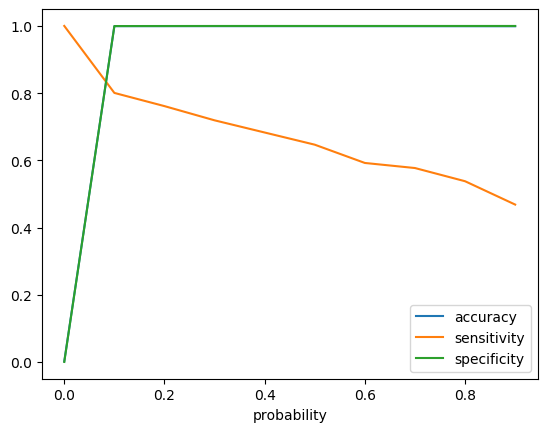

In [51]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(LR_IMB,X_train,y_train)

In [52]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
#We see at 0.1 cutoff our sensitivity is more significant
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(LR_IMB,X_train,y_train,X_test,y_test,0.1)

For Training Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.77      0.80      0.79       331

    accuracy                           1.00    198608
   macro avg       0.89      0.90      0.89    198608
weighted avg       1.00      1.00      1.00    198608
 

[[198199     78]
 [    66    265]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.76      0.75      0.76       142

    accuracy                           1.00     85118
   macro avg       0.88      0.88      0.88     85118
weighted avg       1.00      1.00      1.00     85118
 

[[84943    33]
 [   35   107]]


For Training Data:
The ROC_AUC_Score:  0.9795936707728014


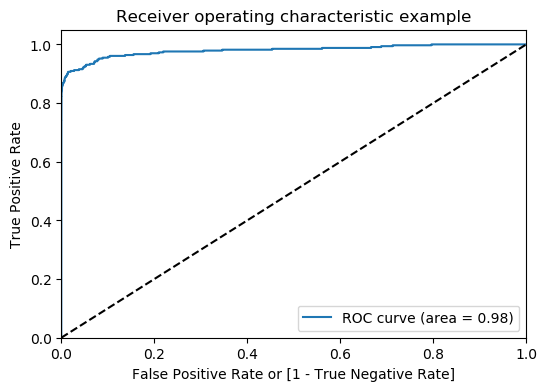



For Testing Data:
The ROC_AUC_Score:  0.9772454393087957


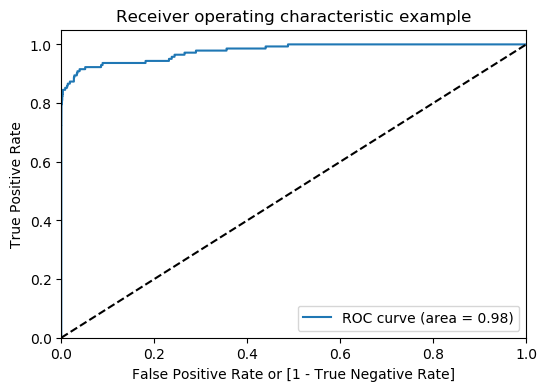

In [53]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_train.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [54]:
#Printing cross validation result
cross_validate(LR_IMB,X_train,y_train)

    fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  49.179682    0.080554      0.974071     0.651515        0.877551  0.747826   
1  51.109243    0.098884      0.990059     0.621212        0.854167  0.719298   
2  54.442938    0.080669      0.974534     0.597015        0.909091  0.720721   
3  53.182940    0.080541      0.980157     0.696970        0.851852  0.766667   
4  53.024635    0.080632      0.966344     0.575758        0.904762  0.703704   

   test_accuracy  
0       0.999270  
1       0.999194  
2       0.999220  
3       0.999295  
4       0.999194  


Avg. values are:



fit_time          52.187887
score_time         0.084256
test_roc_auc       0.977033
test_recall        0.628494
test_precision     0.879484
test_f1            0.731643
test_accuracy      0.999235
dtype: float64


In [55]:
# Printing the test metrics using user defined function
print_model_metrics(y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"Logistic on Imbalanced Dataset ")

------ 

### Logistic on Imbalanced Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  Logistic on Imbalanced Dataset        1.0    0.75  0.98

### 1.2  Decision Tree

In [56]:
# Calling the Logistic Regression Function for imbalanced dataset
DT_IMB = Decision_tree(X_train,y_train,"imbalanced Dataset")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


Best accuracy on  imbalanced Dataset  =  0.9210832135420977
Best parameters :  DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=7, random_state=42)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.490207     1.000000     0.489356
0.1          0.1  0.999517     0.864048     0.999743
0.2          0.2  0.999648     0.842900     0.999909
0.3          0.3  0.999648     0.842900     0.999909
0.4          0.4  0.999658     0.836858     0.999929
0.5          0.5  0.999663     0.824773     0.999955
0.6          0.6  0.999653     0.806647     0.999975
0.7          0.7  0.999632     0.782477     0.999995
0.8          0.8  0.999617     0.770393     1.000000
0.9          0.9  0.999617     0.770393     1.000000


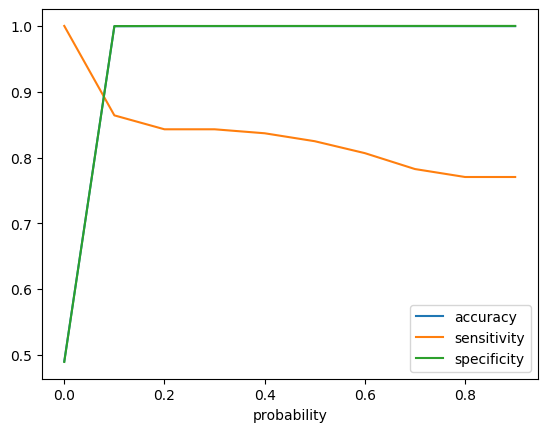

In [57]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(DT_IMB,X_train,y_train)

In [58]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(DT_IMB,X_train,y_train,X_test,y_test,0.1)

For Training Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.85      0.86      0.86       331

    accuracy                           1.00    198608
   macro avg       0.92      0.93      0.93    198608
weighted avg       1.00      1.00      1.00    198608
 

[[198226     51]
 [    45    286]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.74      0.79      0.76       142

    accuracy                           1.00     85118
   macro avg       0.87      0.89      0.88     85118
weighted avg       1.00      1.00      1.00     85118
 

[[84936    40]
 [   30   112]]


For Training Data:
The ROC_AUC_Score:  0.9945130775955096


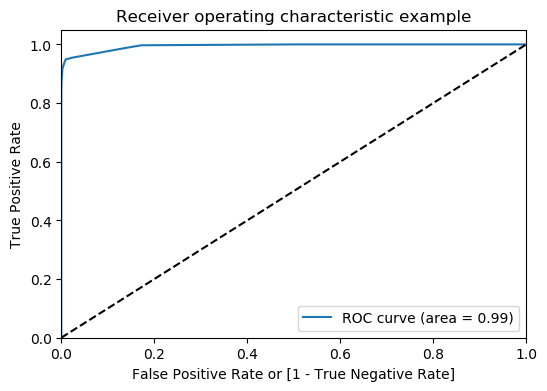



For Testing Data:
The ROC_AUC_Score:  0.9140481836130698


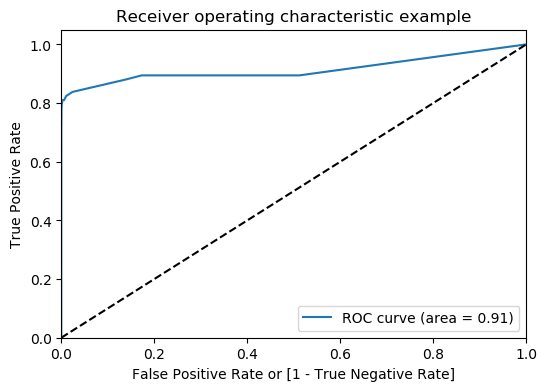

In [59]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_train.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [60]:
#Printing cross validation result
cross_validate(DT_IMB,X_train,y_train)

    fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0   9.813257    0.089113      0.962792     0.818182        0.915254  0.864000   
1  11.934295    0.080914      0.929605     0.772727        0.879310  0.822581   
2  12.700087    0.091085      0.941868     0.686567        0.920000  0.786325   
3  10.336479    0.089119      0.890543     0.757576        0.862069  0.806452   
4  10.846905    0.080975      0.932646     0.772727        0.910714  0.836066   

   test_accuracy  
0       0.999572  
1       0.999446  
2       0.999371  
3       0.999396  
4       0.999496  


Avg. values are:



fit_time          11.126205
score_time         0.086241
test_roc_auc       0.931491
test_recall        0.761556
test_precision     0.897470
test_f1            0.823085
test_accuracy      0.999456
dtype: float64


In [61]:
# Printing the test metrics using user defined function
print_model_metrics(y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"Decision Tree on imbalanced Dataset ")

------ 

### Decision Tree on imbalanced Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  Decision Tree on imbalanced Dataset        1.0    0.79  0.91

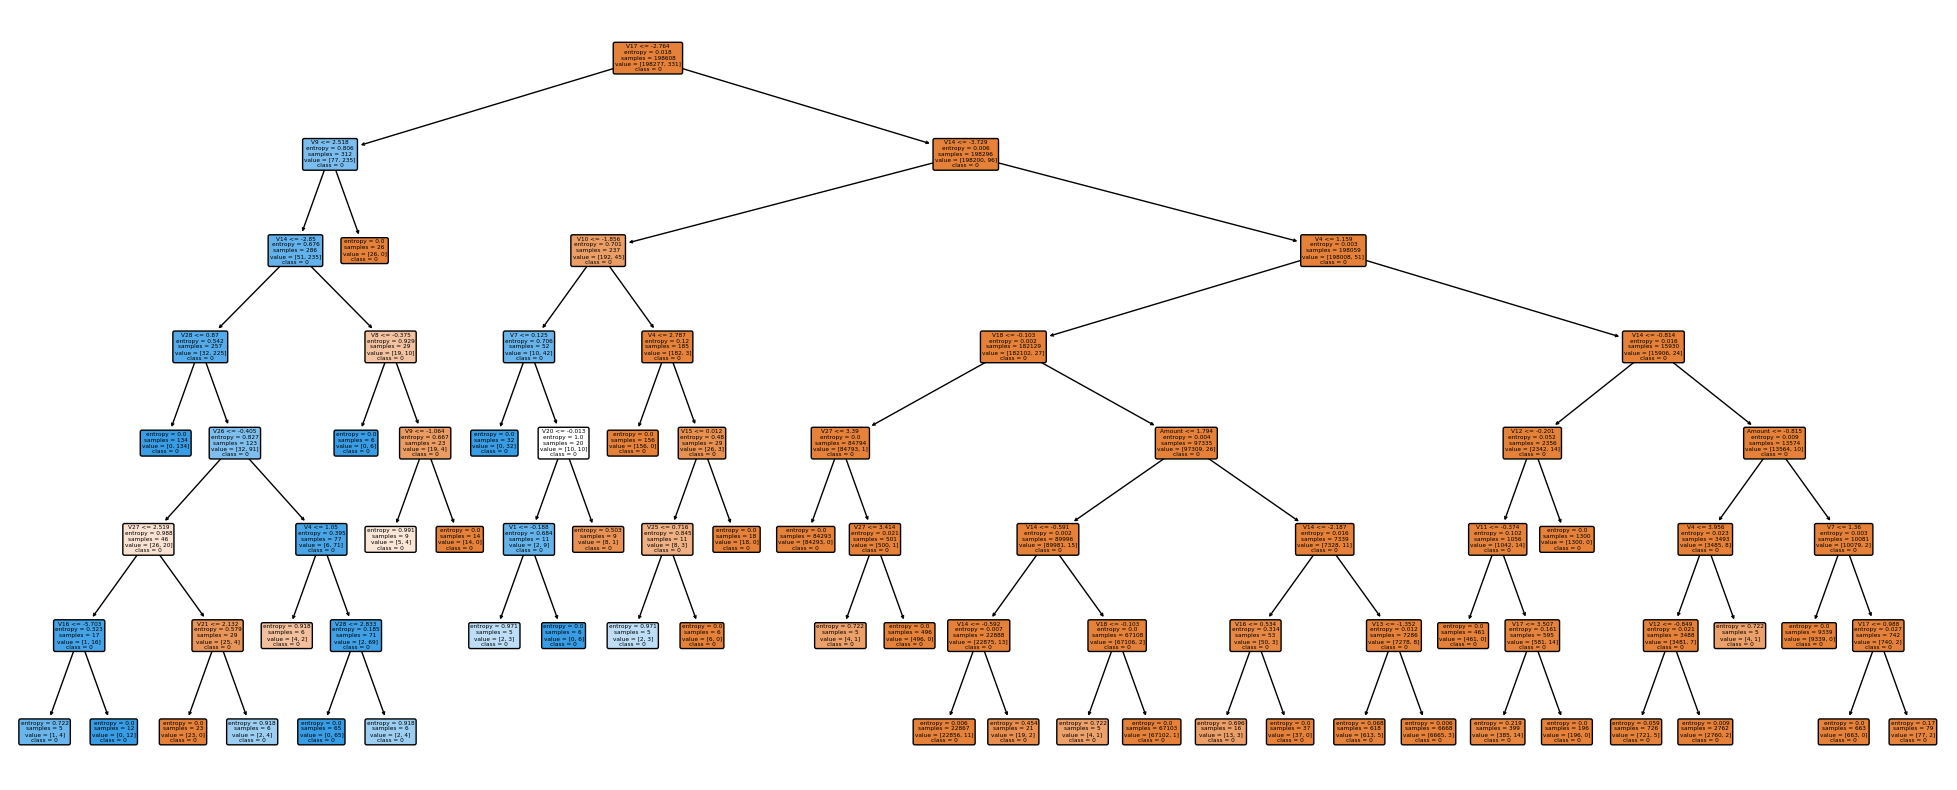

In [62]:
# Visualization of the Decision Tree built
Decision_tree_visual(DT_IMB,y_train)

### 1.3 Random Forest on imbalanced dataset

In [63]:
# Calling Random Forest function
RF_IMB=Random_Forest(X_train,y_train,"imbalanced data")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.8min finished


Best accuracy on  imbalanced data =  0.9752578375405055
Best parameters :  RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       n_estimators=20, oob_score=True, random_state=42,
                       warm_start=True)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.001667     1.000000     0.000000
0.1          0.1  0.999486     0.876133     0.999692
0.2          0.2  0.999567     0.851964     0.999813
0.3          0.3  0.999637     0.845921     0.999894
0.4          0.4  0.999658     0.830816     0.999939
0.5          0.5  0.999673     0.821752     0.999970
0.6          0.6  0.999643     0.794562     0.999985
0.7          0.7  0.999607     0.764350     1.000000
0.8          0.8  0.999522     0.712991     1.000000
0.9          0.9  0.999225     0.534743     1.000000


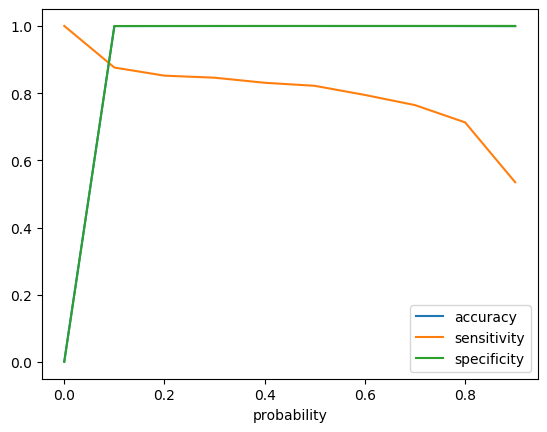

In [64]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(RF_IMB,X_train,y_train)

In [65]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(RF_IMB,X_train,y_train,X_test,y_test,0.1)

For Training Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.83      0.88      0.85       331

    accuracy                           1.00    198608
   macro avg       0.91      0.94      0.93    198608
weighted avg       1.00      1.00      1.00    198608
 

[[198216     61]
 [    41    290]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.72      0.80      0.76       142

    accuracy                           1.00     85118
   macro avg       0.86      0.90      0.88     85118
weighted avg       1.00      1.00      1.00     85118
 

[[84932    44]
 [   28   114]]


For Training Data:
The ROC_AUC_Score:  0.9964426845430483


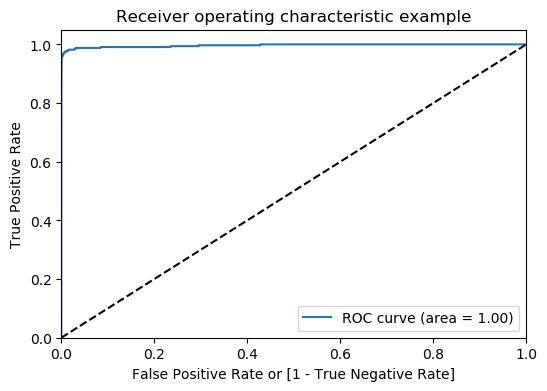



For Testing Data:
The ROC_AUC_Score:  0.9844026382925685


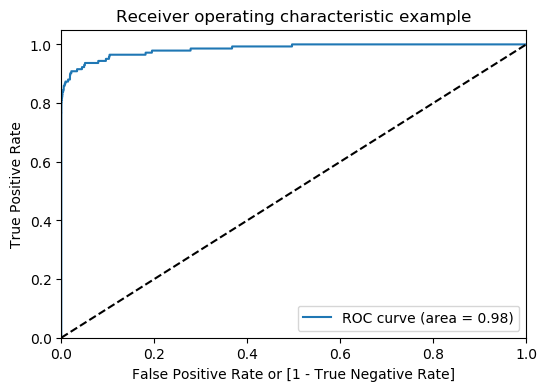

In [66]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_train.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [67]:
#Printing cross validation result
cross_validate(RF_IMB,X_train,y_train)

    fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  28.238267    0.245284      0.977162     0.833333        0.932203  0.880000   
1  28.649647    0.253090      0.986232     0.757576        0.961538  0.847458   
2  28.705464    0.252804      0.971387     0.716418        0.923077  0.806723   
3  29.190917    0.261712      0.967517     0.757576        0.943396  0.840336   
4  28.450964    0.261225      0.967616     0.772727        0.944444  0.850000   

   test_accuracy  
0       0.999622  
1       0.999547  
2       0.999421  
3       0.999522  
4       0.999547  


Avg. values are:



fit_time          28.647052
score_time         0.254823
test_roc_auc       0.973983
test_recall        0.767526
test_precision     0.940932
test_f1            0.844903
test_accuracy      0.999532
dtype: float64


In [68]:
# Printing the test metrics using user defined function
print_model_metrics( y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"Random Forest on imbalanced Dataset ")

------ 

### Random Forest on imbalanced Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  Random Forest on imbalanced Dataset        1.0     0.8  0.98

### 1.4 XG Boost

In [69]:
# Calling XGBoost function
XGB_IMB = XGBoost_classifier(X_train,y_train,'imbalanced dataset')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.5min finished


Best accuracy on  imbalanced dataset =  0.9746316583784448
Best parameters :  XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='total_gain',
              interaction_constraints=None, learning_rate=0.5,
              max_delta_step=None, max_depth=7.742636826811269,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              random_state=42, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=1,
              verbosity=0)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.001667     1.000000     0.000000
0.1          0.1  0.999265     0.800604     0.999597
0.2          0.2  0.999320     0.761329     0.999718
0.3          0.3  0.999340     0.719033     0.999808
0.4          0.4  0.999315     0.679758     0.999849
0.5          0.5  0.999280     0.649547     0.999864
0.6          0.6  0.999204     0.601208     0.999869
0.7          0.7  0.999159     0.574018     0.999869
0.8          0.8  0.999099     0.537764     0.999869
0.9          0.9  0.998988     0.471299     0.999869


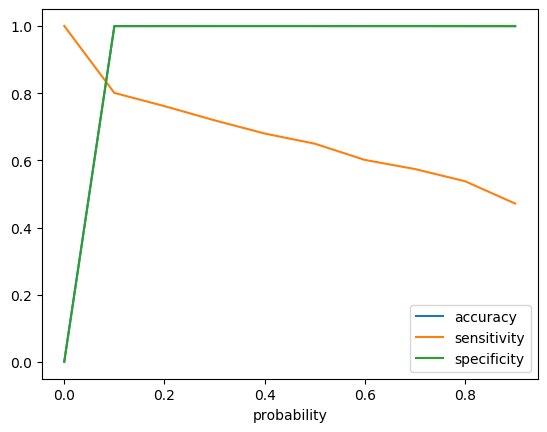

In [70]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(XGB_IMB,X_train,y_train)

In [71]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(XGB_IMB,X_train,y_train,X_test,y_test,0.1)

For Training Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.77      0.80      0.78       331

    accuracy                           1.00    198608
   macro avg       0.88      0.90      0.89    198608
weighted avg       1.00      1.00      1.00    198608
 

[[198197     80]
 [    66    265]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.76      0.75      0.76       142

    accuracy                           1.00     85118
   macro avg       0.88      0.88      0.88     85118
weighted avg       1.00      1.00      1.00     85118
 

[[84943    33]
 [   35   107]]


For Training Data:
The ROC_AUC_Score:  0.9793650547198252


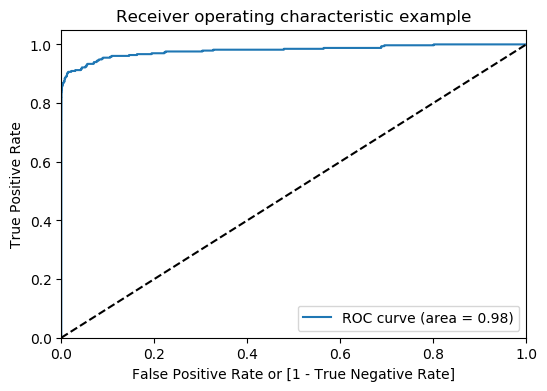



For Testing Data:
The ROC_AUC_Score:  0.9770532557991519


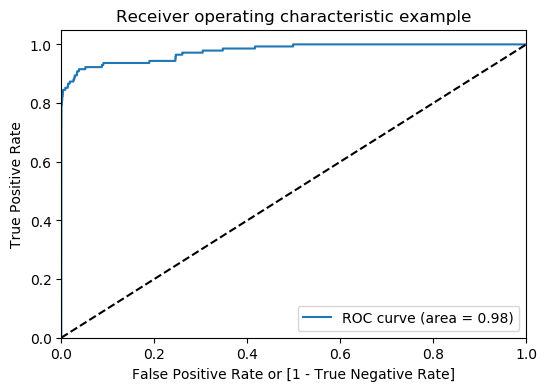

In [72]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_train.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [73]:
#Printing cross validation result
cross_validate(XGB_IMB,X_train,y_train)

   fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  5.320876    0.332380      0.974294     0.651515        0.877551  0.747826   
1  5.315235    0.342440      0.989754     0.621212        0.854167  0.719298   
2  5.238538    0.342640      0.973527     0.597015        0.909091  0.720721   
3  5.287140    0.332239      0.979231     0.696970        0.851852  0.766667   
4  5.370141    0.342380      0.966796     0.575758        0.883721  0.697248   

   test_accuracy  
0       0.999270  
1       0.999194  
2       0.999220  
3       0.999295  
4       0.999169  


Avg. values are:



fit_time          5.306386
score_time        0.338416
test_roc_auc      0.976720
test_recall       0.628494
test_precision    0.875276
test_f1           0.730352
test_accuracy     0.999230
dtype: float64


In [74]:
# Printing the test metrics using user defined function
print_model_metrics( y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"XGBoost on imbalanced Dataset ")

------ 

### XGBoost on imbalanced Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  XGBoost on imbalanced Dataset        1.0    0.75  0.98

### 1.5  SVC(Support Vector Classifier)

In [75]:
# Calling SVC function
svc=SVClassifier(X_train,y_train,'imbalanced data')

In [76]:
# Predicting the labels
y_pred_svc = svc.predict(X_train)

# Printing metrics 
overall_accuracy = metrics.accuracy_score( y_train, y_pred_svc )
print('\nOverall accuracy = ', overall_accuracy)
recall = round(recall_score(y_train,y_pred_svc),2)
print('\nRecall = ', recall)
print('\n',classification_report(y_train, y_pred_svc))


Overall accuracy =  0.9994260049947635

Recall =  0.8

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.84      0.80      0.82       331

    accuracy                           1.00    198608
   macro avg       0.92      0.90      0.91    198608
weighted avg       1.00      1.00      1.00    198608



For Training Data:
The ROC_AUC_Score:  0.9016891243135138


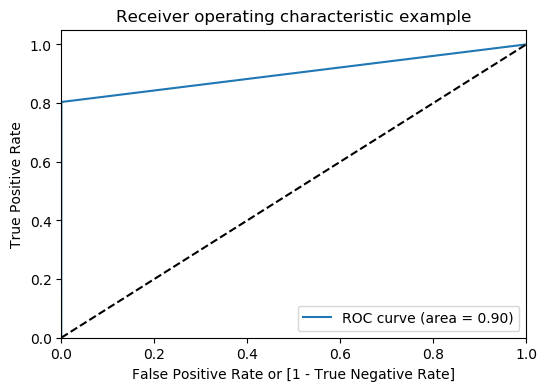

In [77]:
# Roc curve for the training dataset
draw_roc("For Training Data:",y_train,y_pred_svc)

In [78]:
# Predicting labels for test dataset
y_pred_svc = svc.predict(X_test)

# Printing metrics 
overall_accuracy = metrics.accuracy_score( y_test, y_pred_svc )
print('\nOverall accuracy = ', overall_accuracy)
recall = round(recall_score(y_test,y_pred_svc),2)
print('\nRecall = ', recall)
print('\n',classification_report(y_test, y_pred_svc))


Overall accuracy =  0.9992833478230222

Recall =  0.76

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.80      0.76      0.78       142

    accuracy                           1.00     85118
   macro avg       0.90      0.88      0.89     85118
weighted avg       1.00      1.00      1.00     85118



For Testing Data:
The ROC_AUC_Score:  0.8801228217544771


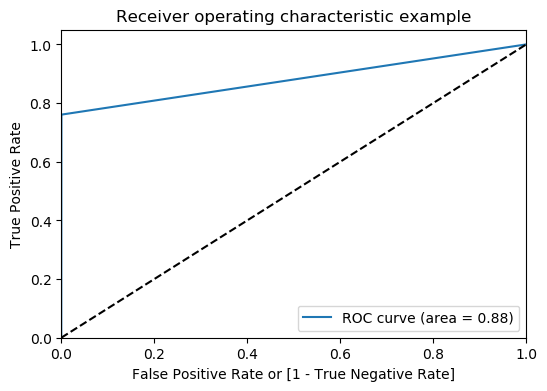

In [79]:
# Roc curve for the test dataset
draw_roc("For Testing Data:",y_test,y_pred_svc)

In [80]:
# Printing metrics for the test data
print_model_metrics(y_test, y_pred_svc,y_pred_svc,"SVM on imbalanced dataset ")

------ 

### SVM on imbalanced dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  SVM on imbalanced dataset        1.0    0.76  0.88

## Model building with balancing Classes

#####  Class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### 2 RandomOversampling

In [81]:
# Initial structure
print(100*y_train.value_counts()/len(y_train))
print("Length of X_train ",len(X_train))

0    99.83334
1     0.16666
Name: Class, dtype: float64
Length of X_train  198608


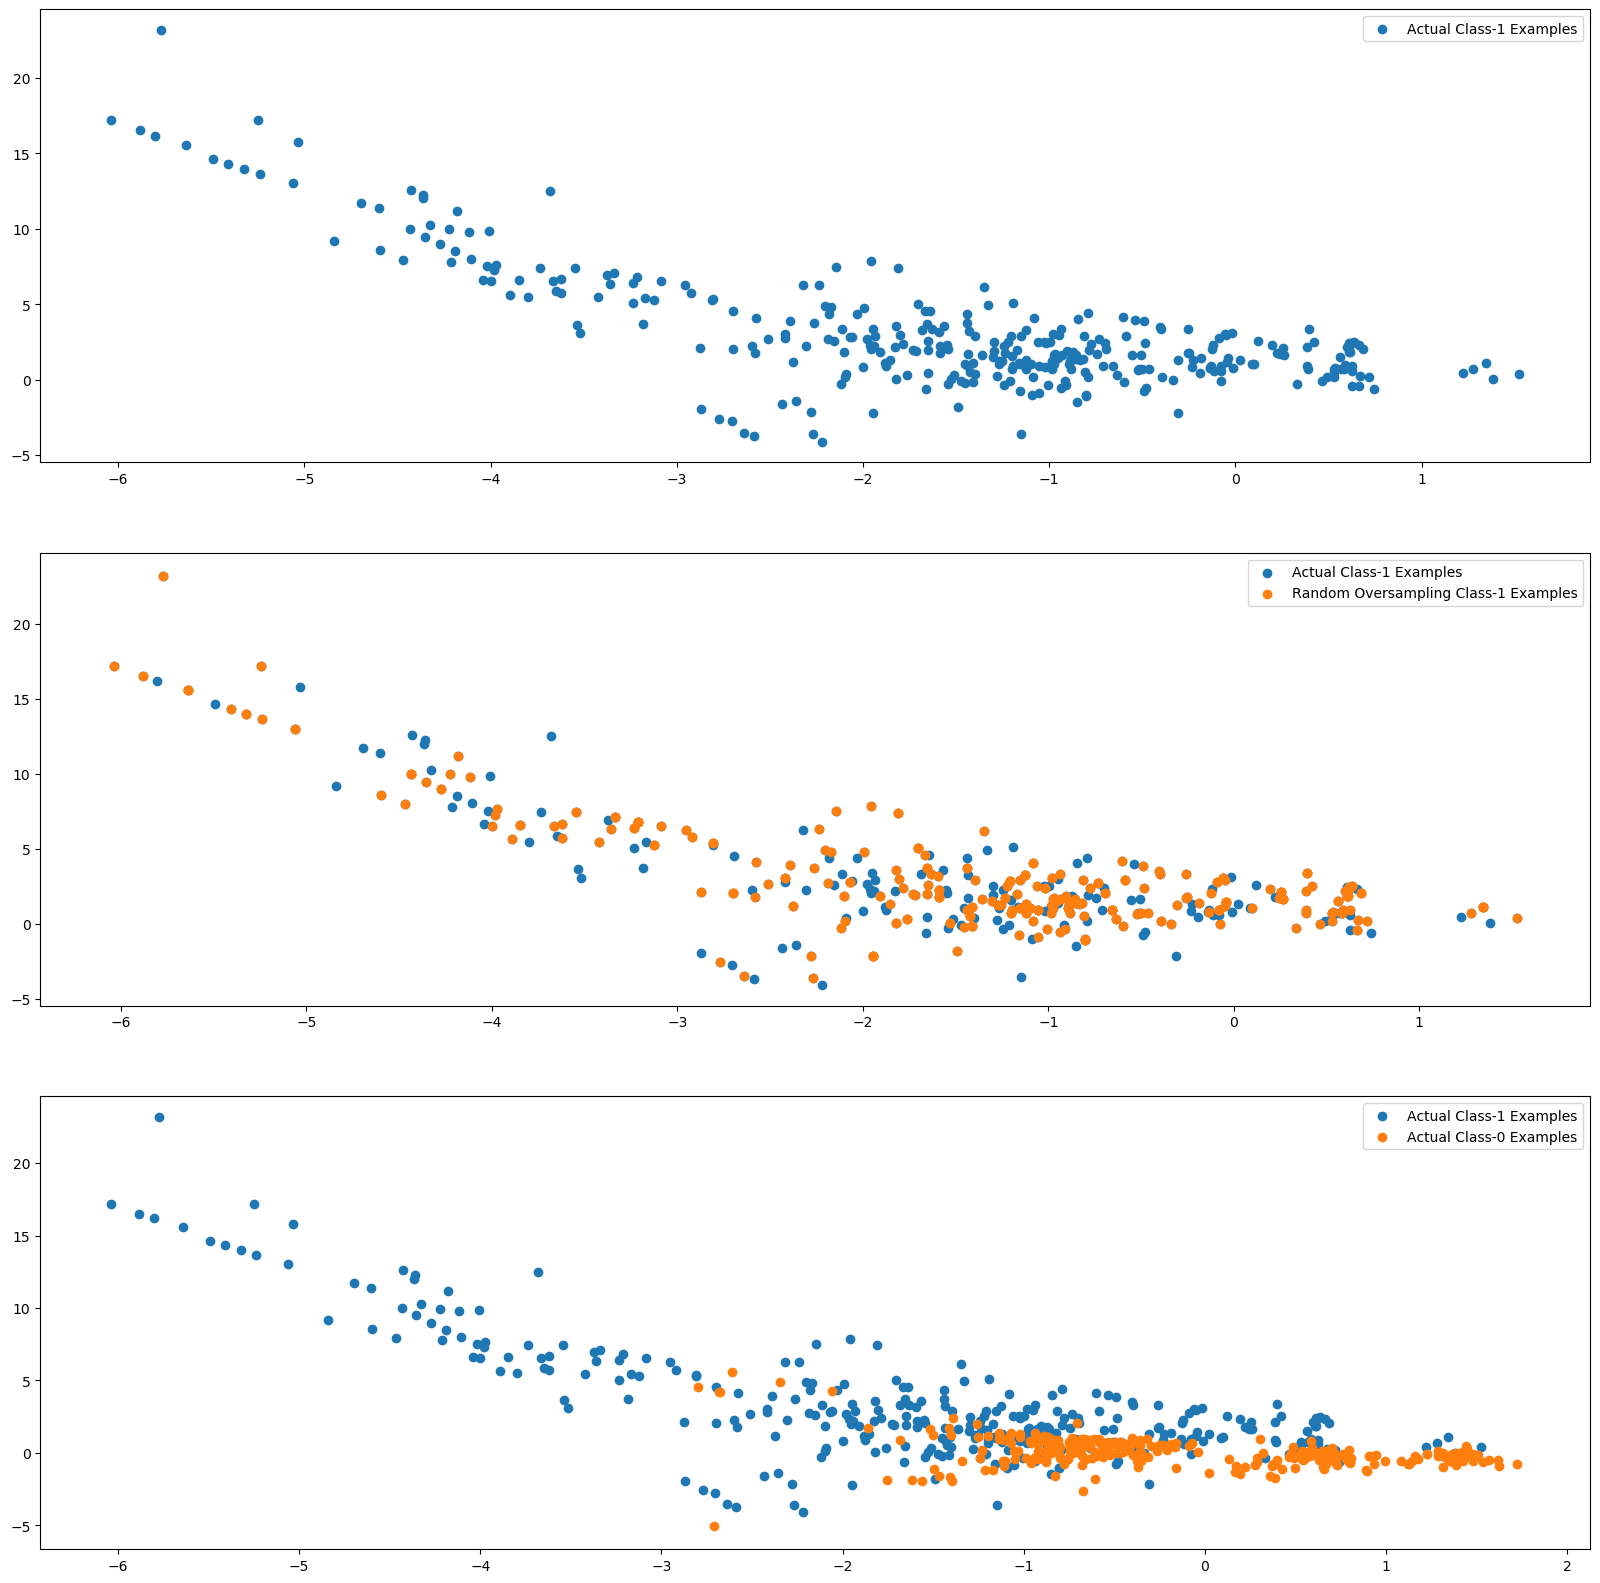

In [82]:
# Defining Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train.reset_index(drop=True))

# Printing distribution of the classes after Random Over Sampling
X_train_ROS_1 = X_ROS[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

# Subplots for the distribution of labels
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ROS_1.iloc[:X_train_1.shape[0], 0], X_train_ROS_1.iloc[:X_train_1.shape[0], 1],
            label='Random Oversampling Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [83]:
# Structure after sampling
print(100*y_ROS.value_counts()/len(y_ROS))
print("\nLength of X_train after Random Over Sampling: ",len(X_ROS))

1    50.0
0    50.0
Name: Class, dtype: float64

Length of X_train after Random Over Sampling:  396554


In [84]:
# Stratified structure
cv_num =  5
from sklearn.model_selection import StratifiedKFold
stratkfold = StratifiedKFold(n_splits=cv_num, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
count=1
for train_ix, test_ix in stratkfold.split(X_ROS,y_ROS):
    # select rows
    print('Fold Number:',count)
    print(train_ix,test_ix)
    X_train_cv, X_test_cv = X_ROS.iloc[list(train_ix)], X_ROS.iloc[list(test_ix)]
    y_train_cv, y_test_cv = y_ROS.iloc[list(train_ix)], y_ROS.iloc[list(test_ix)]
    # summarize train and test composition
    train_0, train_1 = len(y_train_cv[y_train_cv==0]), len(y_train_cv[y_train_cv==1])
    test_0, test_1 = len(y_test_cv[y_test_cv==0]), len(y_test_cv[y_test_cv==1])
    print('>Train: 0=%d, 1=%d\n>Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    print('\n')
    count+=1

Fold Number: 1
[     0      1      2 ... 396551 396552 396553] [     3     10     12 ... 396533 396541 396543]
>Train: 0=158621, 1=158622
>Test: 0=39656, 1=39655


Fold Number: 2
[     0      2      3 ... 396547 396548 396552] [     1      5      7 ... 396550 396551 396553]
>Train: 0=158621, 1=158622
>Test: 0=39656, 1=39655


Fold Number: 3
[     0      1      2 ... 396551 396552 396553] [     4     13     17 ... 396540 396542 396544]
>Train: 0=158622, 1=158621
>Test: 0=39655, 1=39656


Fold Number: 4
[     1      3      4 ... 396551 396552 396553] [     0      2      6 ... 396528 396545 396547]
>Train: 0=158622, 1=158621
>Test: 0=39655, 1=39656


Fold Number: 5
[     0      1      2 ... 396550 396551 396553] [     8     22     29 ... 396546 396548 396552]
>Train: 0=158622, 1=158622
>Test: 0=39655, 1=39655




### 2.1  Logistic Regression on Random Oversampling dataset

In [85]:
# Calling the Logistic Regression Function for imbalanced dataset
LR_ROS = Logistic_Regression(X_ROS, y_ROS,"Random Over Sampling dataset")

Best parameters found for Logistic Regression with Random Over Sampling dataset :  {'penalty': 'l2', 'C': 3593.813663804626}


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.886381     0.985026     0.787736
0.2          0.2  0.930297     0.960757     0.899837
0.3          0.3  0.943491     0.945632     0.941350
0.4          0.4  0.946799     0.930758     0.962840
0.5          0.5  0.951807     0.927838     0.975776
0.6          0.6  0.948272     0.912673     0.983871
0.7          0.7  0.946544     0.903746     0.989343
0.8          0.8  0.941188     0.889130     0.993247
0.9          0.9  0.931346     0.865632     0.997060


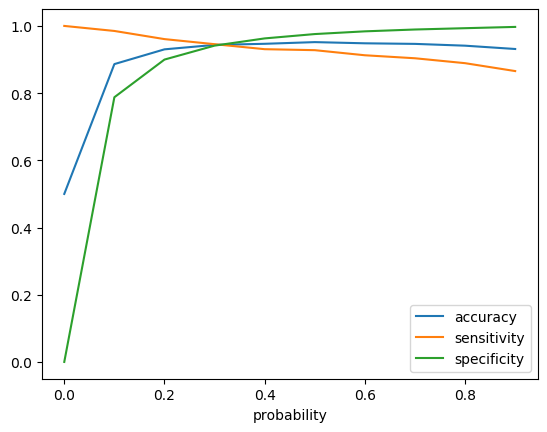

In [86]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(LR_ROS,X_ROS, y_ROS)

In [87]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
#Here we are looking for high recall
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(LR_ROS,X_ROS, y_ROS,X_test,y_test,0.1)

For Training Data:

              precision    recall  f1-score   support

           0       0.98      0.79      0.87    198277
           1       0.82      0.99      0.90    198277

    accuracy                           0.89    396554
   macro avg       0.90      0.89      0.89    396554
weighted avg       0.90      0.89      0.89    396554
 

[[156190  42087]
 [  2969 195308]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     84976
           1       0.01      0.96      0.02       142

    accuracy                           0.79     85118
   macro avg       0.50      0.88      0.45     85118
weighted avg       1.00      0.79      0.88     85118
 

[[67055 17921]
 [    5   137]]


For Training Data:
The ROC_AUC_Score:  0.9872848503167986


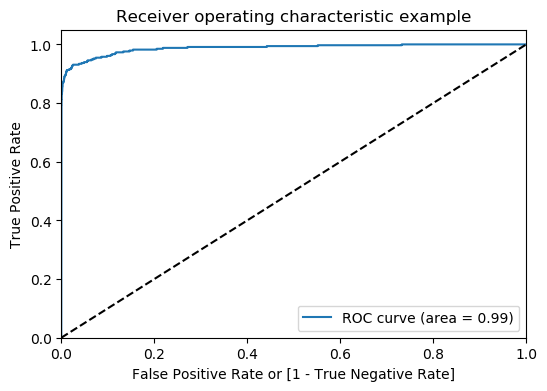



For Testing Data:
The ROC_AUC_Score:  0.9684625120332235


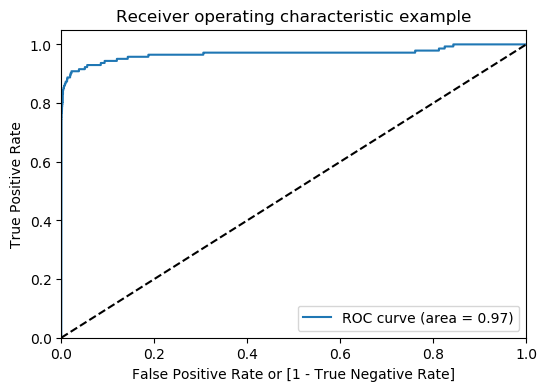

In [88]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_ROS.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [89]:
#Printing cross validation result
cross_validate(LR_ROS,X_ROS, y_ROS)

    fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  96.235936    0.201611      0.986999     0.926340        0.974661  0.949886   
1  93.919055    0.189299      0.987667     0.927903        0.975142  0.950936   
2  93.317634    0.203729      0.987140     0.926089        0.974500  0.949678   
3  95.138905    0.199339      0.986946     0.928661        0.973075  0.950350   
4  92.659952    0.201680      0.987601     0.930198        0.974557  0.951861   

   test_accuracy  
0       0.951129  
1       0.952125  
2       0.950927  
3       0.951482  
4       0.952957  


Avg. values are:



fit_time          94.254297
score_time         0.199132
test_roc_auc       0.987271
test_recall        0.927838
test_precision     0.974387
test_f1            0.950542
test_accuracy      0.951724
dtype: float64


In [90]:
# Printing the test metrics using user defined function
print_model_metrics(y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"Logistic on Random Over Sampling Dataset ")

------ 

### Logistic on Random Over Sampling Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  Logistic on Random Over Sampling Dataset       0.79    0.96  0.97

### 2.2 Decision Tree on Random Oversampling dataset

In [91]:
# Calling the Logistic Regression Function for imbalanced dataset
DT_ROS = Decision_tree(X_ROS, y_ROS,"Random Over Sampling Dataset")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.8min finished


Best accuracy on  Random Over Sampling Dataset  =  0.9996643455715649
Best parameters :  DecisionTreeClassifier(max_depth=11, min_samples_leaf=9, min_samples_split=9,
                       random_state=42)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.996217     1.000000     0.992435
0.1          0.1  0.996217     1.000000     0.992435
0.2          0.2  0.996217     1.000000     0.992435
0.3          0.3  0.996217     1.000000     0.992435
0.4          0.4  0.996217     1.000000     0.992435
0.5          0.5  0.996709     0.997282     0.996137
0.6          0.6  0.996709     0.997282     0.996137
0.7          0.7  0.995857     0.994281     0.997433
0.8          0.8  0.995857     0.994281     0.997433
0.9          0.9  0.995857     0.994281     0.997433


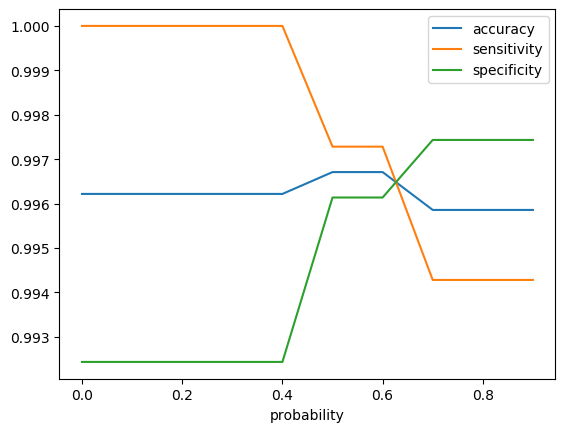

In [92]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(DT_ROS,X_ROS, y_ROS)

In [93]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(DT_ROS,X_ROS, y_ROS,X_test,y_test,0.9)

For Training Data:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    198277
           1       1.00      0.99      1.00    198277

    accuracy                           1.00    396554
   macro avg       1.00      1.00      1.00    396554
weighted avg       1.00      1.00      1.00    396554
 

[[197768    509]
 [  1134 197143]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.29      0.77      0.42       142

    accuracy                           1.00     85118
   macro avg       0.64      0.88      0.71     85118
weighted avg       1.00      1.00      1.00     85118
 

[[84704   272]
 [   33   109]]


For Training Data:
The ROC_AUC_Score:  0.9998749115091483


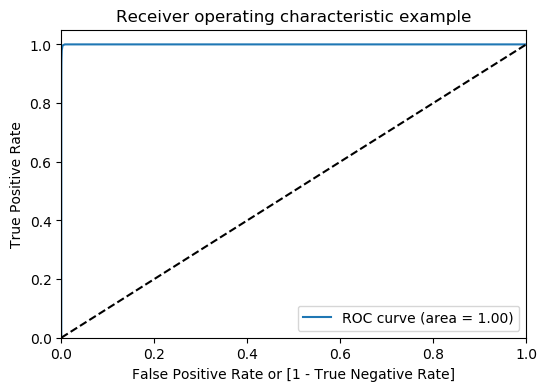



For Testing Data:
The ROC_AUC_Score:  0.8932640218547208


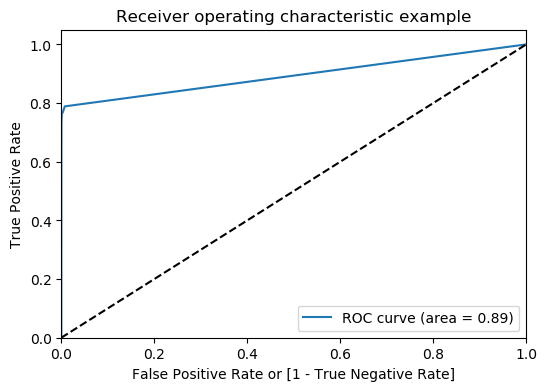

In [94]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_ROS.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [95]:
#Printing cross validation result
cross_validate(DT_ROS,X_ROS, y_ROS)

    fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  10.093143    0.190061      0.999752     0.997125        0.995920  0.996522   
1   9.724169    0.192517      0.999719     0.997377        0.995820  0.996598   
2   9.755762    0.192371      0.999724     0.997352        0.996172  0.996762   
3   9.728680    0.200257      0.999750     0.997403        0.995670  0.996536   
4   9.846995    0.182181      0.999723     0.997150        0.996020  0.996585   

   test_accuracy  
0       0.996520  
1       0.996596  
2       0.996760  
3       0.996533  
4       0.996583  


Avg. values are:



fit_time          9.829750
score_time        0.191478
test_roc_auc      0.999734
test_recall       0.997282
test_precision    0.995920
test_f1           0.996601
test_accuracy     0.996598
dtype: float64


### After looking at the precision and recall values we can clearly say that the Decision tree is Overfitting

In [96]:
# Printing the metrics using user defined function
print_model_metrics(y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"Decision Tree on Random Over Sampling Dataset ")

------ 

### Decision Tree on Random Over Sampling Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  Decision Tree on Random Over Sampling Dataset        1.0    0.77  0.89

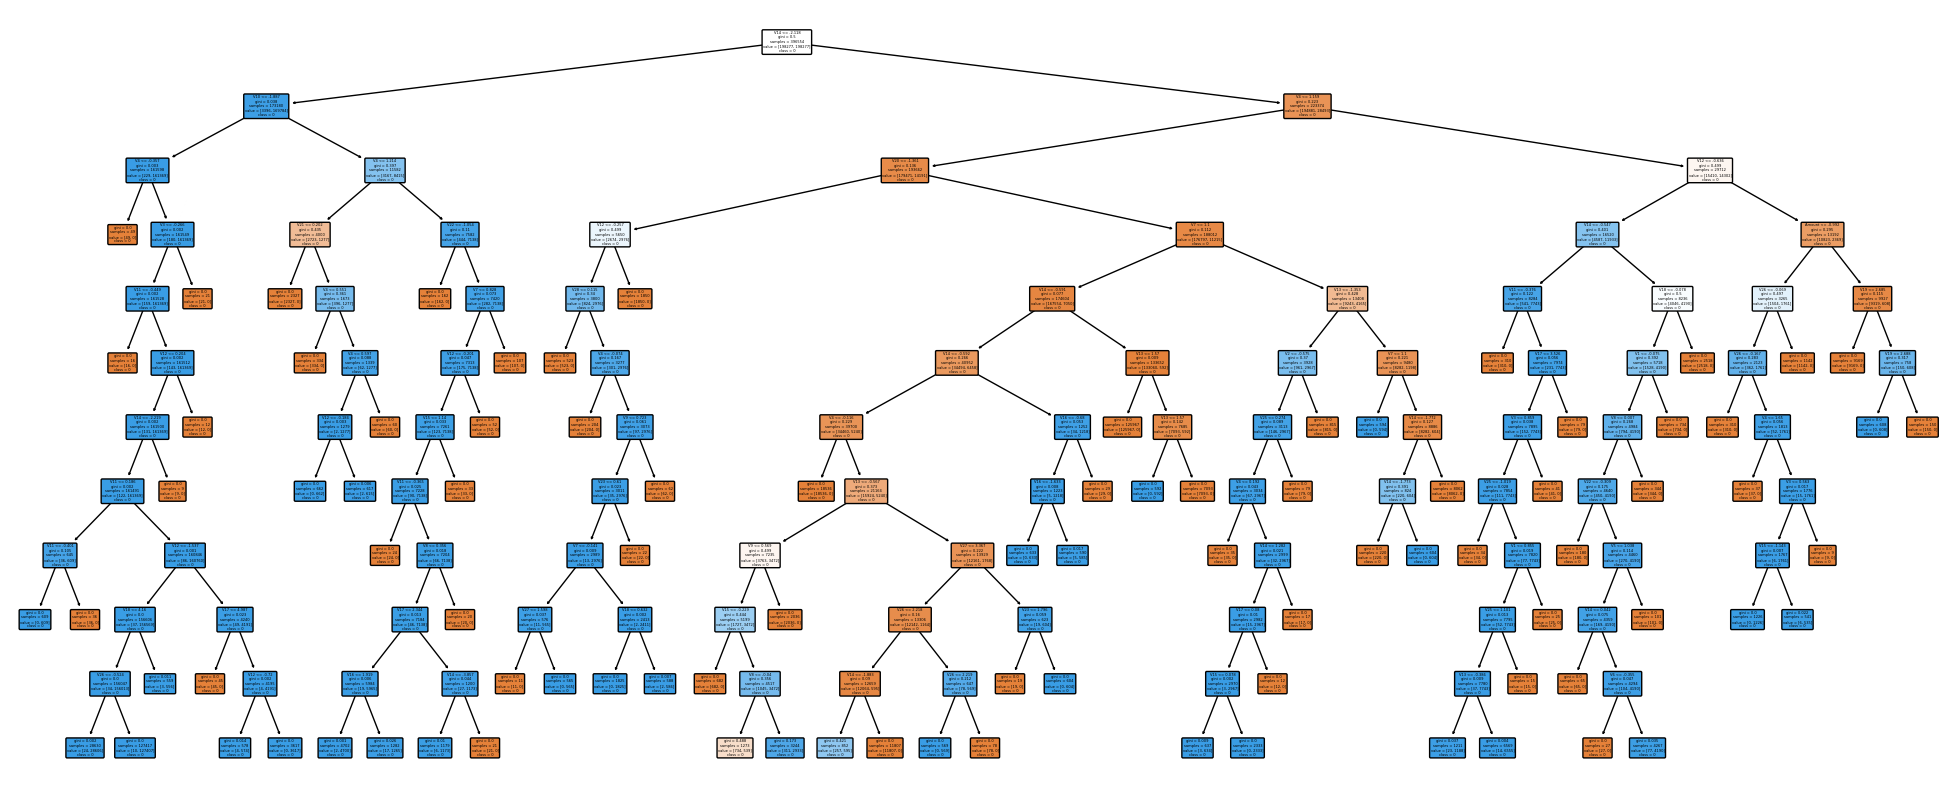

In [97]:
# Visualization of the Decision Tree built
Decision_tree_visual(DT_ROS,y_ROS)

### 2.3 Random Forest on Random Oversampling dataset

In [98]:
# Calling Random Forest function
RF_ROS=Random_Forest(X_ROS, y_ROS,"Random Over Sampling dataset")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.4min finished


Best accuracy on  Random Over Sampling dataset =  0.999964102467426
Best parameters :  RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=9,
                       min_samples_split=7, n_estimators=20, oob_score=True,
                       random_state=42, warm_start=True)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.529360     1.000000     0.058721
0.1          0.1  0.962880     1.000000     0.925760
0.2          0.2  0.993194     1.000000     0.986388
0.3          0.3  0.997302     0.997161     0.997443
0.4          0.4  0.996755     0.994175     0.999334
0.5          0.5  0.993963     0.988183     0.999743
0.6          0.6  0.991028     0.982222     0.999834
0.7          0.7  0.978946     0.958003     0.999889
0.8          0.8  0.964007     0.928060     0.999955
0.9          0.9  0.952049     0.904139     0.999960


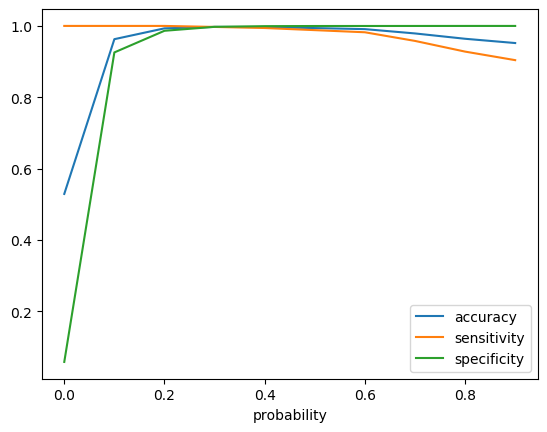

In [99]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(RF_ROS,X_ROS, y_ROS)

In [100]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(RF_ROS,X_ROS, y_ROS,X_test,y_test,0.7)

For Training Data:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    198277
           1       1.00      0.96      0.98    198277

    accuracy                           0.98    396554
   macro avg       0.98      0.98      0.98    396554
weighted avg       0.98      0.98      0.98    396554
 

[[198255     22]
 [  8327 189950]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.90      0.74      0.81       142

    accuracy                           1.00     85118
   macro avg       0.95      0.87      0.91     85118
weighted avg       1.00      1.00      1.00     85118
 

[[84964    12]
 [   37   105]]


For Training Data:
The ROC_AUC_Score:  0.9999708905038363


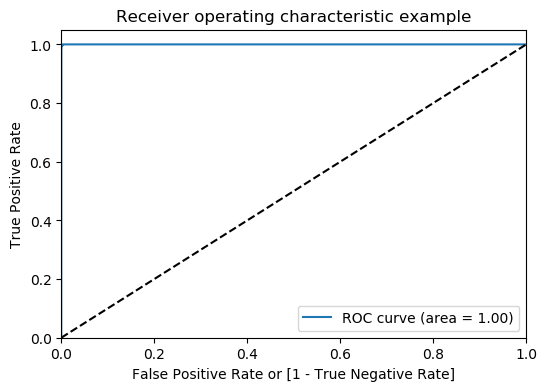



For Testing Data:
The ROC_AUC_Score:  0.9626740093640358


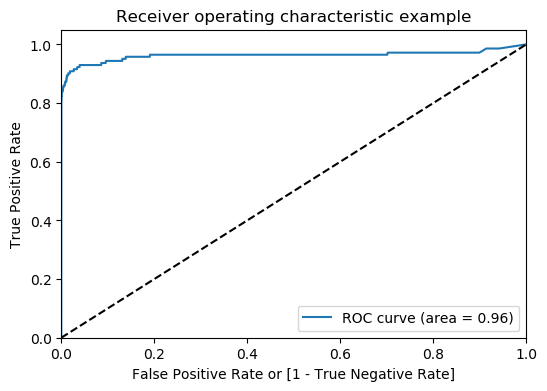

In [101]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_ROS.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [102]:
#Printing cross validation result
cross_validate(RF_ROS,X_ROS, y_ROS)

    fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  35.558640    0.653847      0.999962     0.994956        0.999595  0.997270   
1  37.018293    0.645750      0.999971     0.988501        0.999541  0.993990   
2  36.252562    0.638222      0.999959     0.981314        0.999717  0.990430   
3  35.987368    0.637940      0.999934     0.987543        0.999464  0.993468   
4  35.752287    0.636011      0.999979     0.992283        0.999797  0.996026   

   test_accuracy  
0       0.997277  
1       0.994024  
2       0.990518  
3       0.993507  
4       0.996041  


Avg. values are:



fit_time          36.113830
score_time         0.642354
test_roc_auc       0.999961
test_recall        0.988920
test_precision     0.999623
test_f1            0.994237
test_accuracy      0.994273
dtype: float64


In [103]:
# Printing the test metrics using user defined function
print_model_metrics( y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"Random Forest on Random Over Sampling Dataset ")

------ 

### Random Forest on Random Over Sampling Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  Random Forest on Random Over Sampling Dataset        1.0    0.74  0.96

### 2.4 XG Boost on Random Oversampling dataset

In [104]:
# Calling XGBoost function
XGB_ROS = XGBoost_classifier(X_ROS, y_ROS,'Random Over Sampling dataset')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.0min finished


Best accuracy on  Random Over Sampling dataset =  0.9871737771574968
Best parameters :  XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='cover', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None,
              max_depth=464.15888336127773, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=None, random_state=42, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=1, subsample=None,
              tree_method=None, validate_parameters=1, verbosity=0)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.886472     0.988072     0.784872
0.2          0.2  0.928411     0.957756     0.899065
0.3          0.3  0.943564     0.945632     0.941496
0.4          0.4  0.946948     0.930758     0.963137
0.5          0.5  0.951883     0.927838     0.975928
0.6          0.6  0.948370     0.912673     0.984068
0.7          0.7  0.946734     0.903993     0.989474
0.8          0.8  0.941264     0.889130     0.993398
0.9          0.9  0.931404     0.865632     0.997176


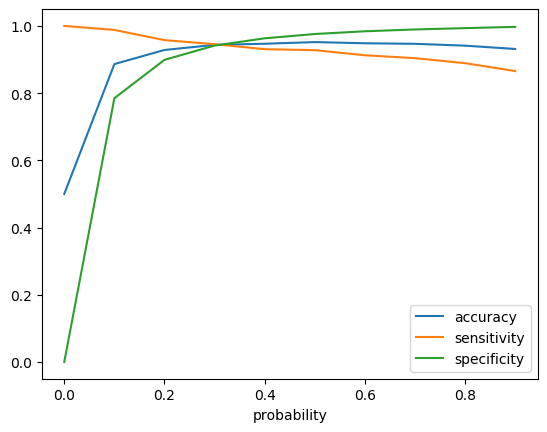

In [105]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(XGB_ROS,X_ROS, y_ROS)

In [106]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(XGB_ROS,X_ROS, y_ROS,X_test,y_test,0.1)

For Training Data:

              precision    recall  f1-score   support

           0       0.99      0.78      0.87    198277
           1       0.82      0.99      0.90    198277

    accuracy                           0.89    396554
   macro avg       0.90      0.89      0.89    396554
weighted avg       0.90      0.89      0.89    396554
 

[[155622  42655]
 [  2365 195912]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     84976
           1       0.01      0.96      0.01       142

    accuracy                           0.79     85118
   macro avg       0.50      0.88      0.45     85118
weighted avg       1.00      0.79      0.88     85118
 

[[66836 18140]
 [    5   137]]


For Training Data:
The ROC_AUC_Score:  0.9871877990133149


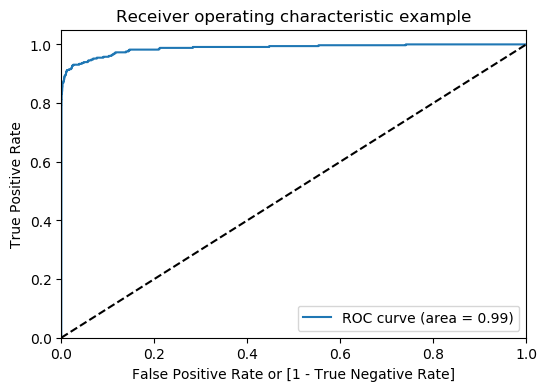



For Testing Data:
The ROC_AUC_Score:  0.9688873212917117


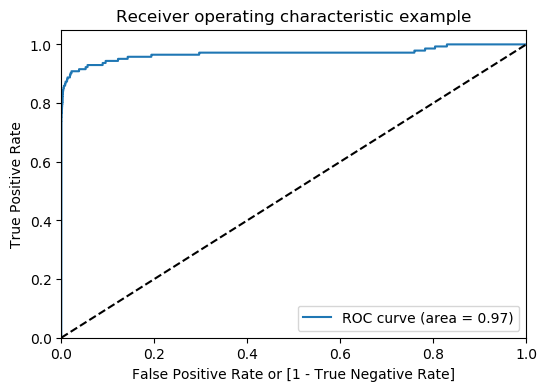

In [107]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_ROS.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [108]:
#Printing cross validation result
cross_validate(XGB_ROS,X_ROS, y_ROS)

    fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  10.629997    0.613939      0.986919     0.922961        0.974882  0.948211   
1  10.573898    0.614322      0.987561     0.927903        0.975271  0.950998   
2  10.539818    0.614832      0.987026     0.926089        0.974836  0.949838   
3  10.554932    0.613934      0.986855     0.928661        0.973255  0.950436   
4  11.238992    0.644402      0.987504     0.926642        0.974798  0.950111   

   test_accuracy  
0       0.949591  
1       0.952188  
2       0.951091  
3       0.951570  
4       0.951343  


Avg. values are:



fit_time          10.707527
score_time         0.620286
test_roc_auc       0.987173
test_recall        0.926451
test_precision     0.974609
test_f1            0.949918
test_accuracy      0.951157
dtype: float64


In [109]:
# Printing the test metrics using user defined function
print_model_metrics( y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"XGBoost on Random Over Sampling Dataset ")

------ 

### XGBoost on Random Over Sampling Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  XGBoost on Random Over Sampling Dataset       0.79    0.96  0.97

###  3  SMOTE

In [110]:
# Initial structure
print(100*y_train.value_counts()/len(y_train))
print("Length of X_train ",len(X_train))

0    99.83334
1     0.16666
Name: Class, dtype: float64
Length of X_train  198608


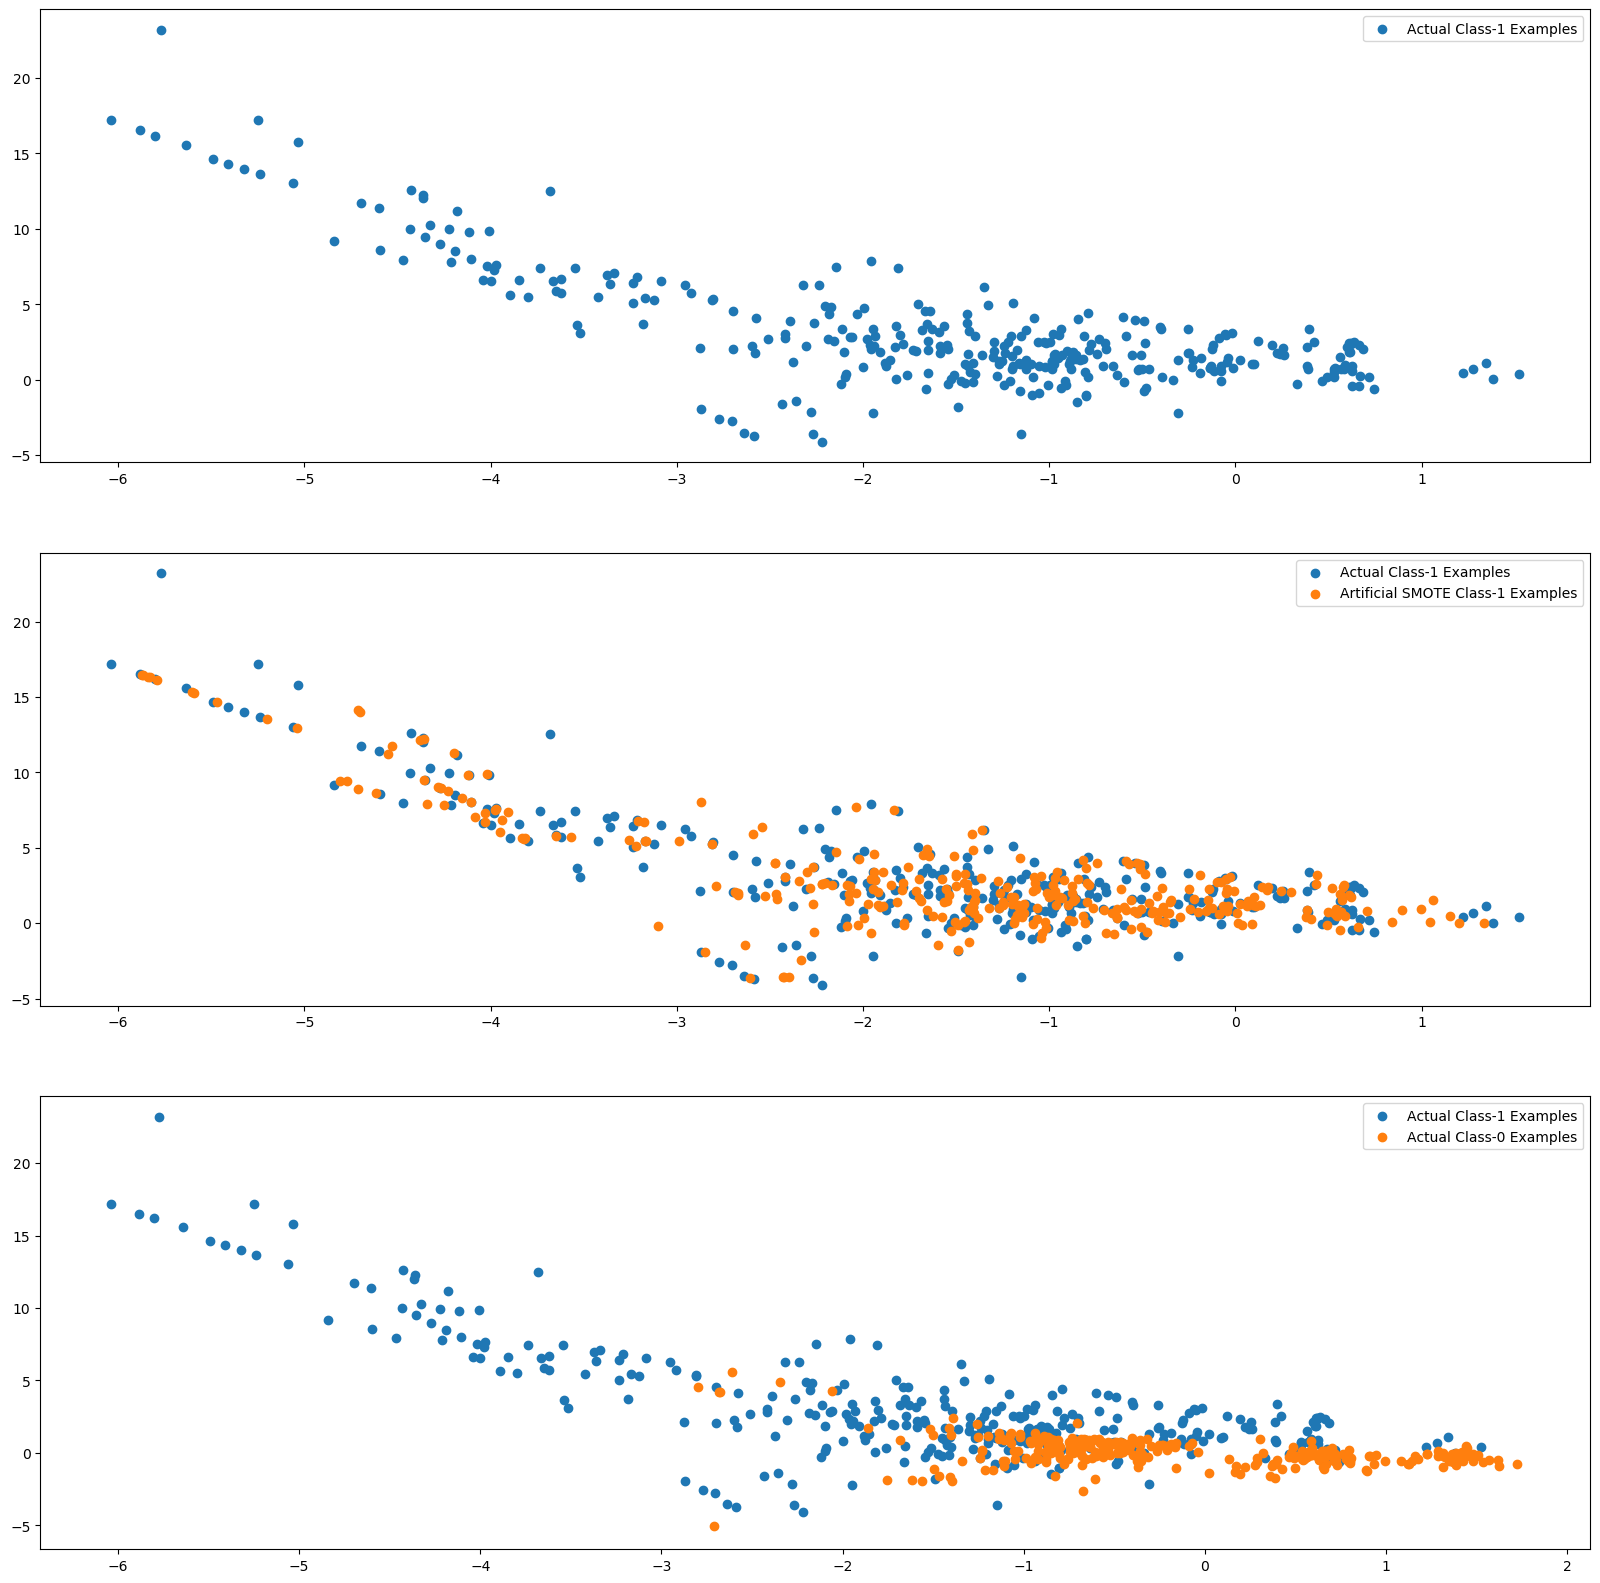

In [111]:
# Applying SMOTE technique for the imbalanced dataset
smo = SMOTE(random_state=42)
X_smote, y_smote = smo.fit_resample(X_train, y_train.reset_index(drop=True))

# Printing the distribution of labels across the dataset
X_train_smote_1 = X_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

# Subplots for the distribution
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [112]:
# Structure after sampling
print(100*y_smote.value_counts()/len(y_smote))
print("\nThe length of X train after performing smote: ",len(X_smote))

1    50.0
0    50.0
Name: Class, dtype: float64

The length of X train after performing smote:  396554


In [113]:
# Stratified structure
from sklearn.model_selection import StratifiedKFold
stratkfold = StratifiedKFold(n_splits=cv_num, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
count=1
for train_ix, test_ix in stratkfold.split(X_smote,y_smote):
    # select rows
    print('Fold Number:',count)
    print(train_ix,test_ix)
    X_train_cv, X_test_cv = X_smote.iloc[list(train_ix)], X_smote.iloc[list(test_ix)]
    y_train_cv, y_test_cv = y_smote.iloc[list(train_ix)], y_smote.iloc[list(test_ix)]
    # summarize train and test composition
    train_0, train_1 = len(y_train_cv[y_train_cv==0]), len(y_train_cv[y_train_cv==1])
    test_0, test_1 = len(y_test_cv[y_test_cv==0]), len(y_test_cv[y_test_cv==1])
    print('>Train: 0=%d, 1=%d\n>Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    print('\n')
    count+=1

Fold Number: 1
[     0      1      2 ... 396551 396552 396553] [     3     10     12 ... 396533 396541 396543]
>Train: 0=158621, 1=158622
>Test: 0=39656, 1=39655


Fold Number: 2
[     0      2      3 ... 396547 396548 396552] [     1      5      7 ... 396550 396551 396553]
>Train: 0=158621, 1=158622
>Test: 0=39656, 1=39655


Fold Number: 3
[     0      1      2 ... 396551 396552 396553] [     4     13     17 ... 396540 396542 396544]
>Train: 0=158622, 1=158621
>Test: 0=39655, 1=39656


Fold Number: 4
[     1      3      4 ... 396551 396552 396553] [     0      2      6 ... 396528 396545 396547]
>Train: 0=158622, 1=158621
>Test: 0=39655, 1=39656


Fold Number: 5
[     0      1      2 ... 396550 396551 396553] [     8     22     29 ... 396546 396548 396552]
>Train: 0=158622, 1=158622
>Test: 0=39655, 1=39655




### 3.1 Logistic Regression on SMOTE dataset

In [114]:
# Calling the Logistic Regression Function for imbalanced dataset
LR_SMT = Logistic_Regression(X_smote, y_smote,"SMOTE dataset")

Best parameters found for Logistic Regression with SMOTE dataset :  {'penalty': 'l2', 'C': 3593.813663804626}


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.885670     0.984275     0.787066
0.2          0.2  0.934634     0.968786     0.900483
0.3          0.3  0.947425     0.953918     0.940931
0.4          0.4  0.948627     0.936715     0.960540
0.5          0.5  0.947145     0.921605     0.972685
0.6          0.6  0.944923     0.908466     0.981380
0.7          0.7  0.941226     0.895434     0.987018
0.8          0.8  0.936649     0.882119     0.991179
0.9          0.9  0.926277     0.857149     0.995405


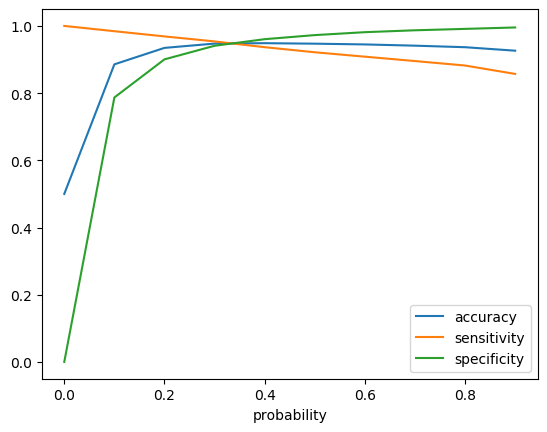

In [115]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(LR_SMT,X_smote, y_smote)

In [116]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(LR_SMT,X_smote, y_smote,X_test,y_test,0.1)

For Training Data:

              precision    recall  f1-score   support

           0       0.98      0.79      0.87    198277
           1       0.82      0.98      0.90    198277

    accuracy                           0.89    396554
   macro avg       0.90      0.89      0.88    396554
weighted avg       0.90      0.89      0.88    396554
 

[[156057  42220]
 [  3118 195159]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     84976
           1       0.01      0.96      0.01       142

    accuracy                           0.79     85118
   macro avg       0.50      0.87      0.45     85118
weighted avg       1.00      0.79      0.88     85118
 

[[67081 17895]
 [    6   136]]


For Training Data:
The ROC_AUC_Score:  0.9885302334505678


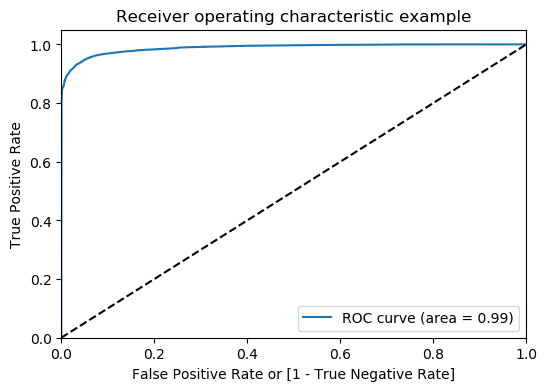



For Testing Data:
The ROC_AUC_Score:  0.9674810418716403


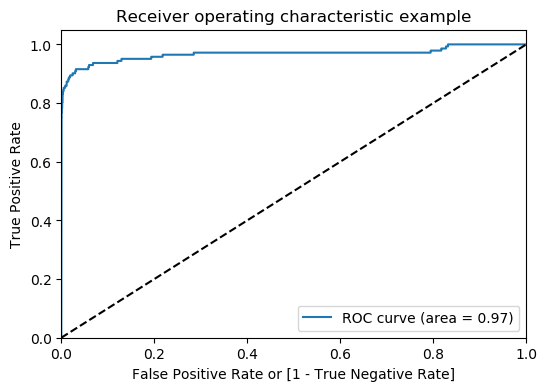

In [117]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_smote.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [118]:
#Printing cross validation result
cross_validate(LR_SMT,X_smote, y_smote)

       fit_time  score_time  test_roc_auc  test_recall  test_precision  \
0  29514.946547    0.227362      0.988950     0.922658        0.971251   
1     93.384609    0.172765      0.988530     0.921674        0.971144   
2    108.458414    0.162985      0.988371     0.922534        0.971145   
3    106.295875    0.211804      0.988173     0.922458        0.970344   
4     91.018915    0.160216      0.988621     0.919127        0.971895   

    test_f1  test_accuracy  
0  0.946331       0.947674  
1  0.945763       0.947145  
2  0.946215       0.947561  
3  0.945795       0.947132  
4  0.944775       0.946274  


Avg. values are:



fit_time          5982.820872
score_time           0.187026
test_roc_auc         0.988529
test_recall          0.921690
test_precision       0.971156
test_f1              0.945776
test_accuracy        0.947157
dtype: float64


In [119]:
# Printing the test metrics using user defined function
print_model_metrics(y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"Logistic on SMOTE Dataset ")

------ 

### Logistic on SMOTE Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  Logistic on SMOTE Dataset       0.79    0.96  0.97

### 3.2 Decision Tree on SMOTE dataset

In [120]:
# Calling the Logistic Regression Function for imbalanced dataset
DT_SMT = Decision_tree(X_smote, y_smote,"SMOTE Dataset")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


Best accuracy on  SMOTE Dataset  =  0.9986587225270375
Best parameters :  DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=3,
                       random_state=42)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.985460     1.000000     0.970919
0.1          0.1  0.987810     0.999904     0.975716
0.2          0.2  0.988188     0.999808     0.976568
0.3          0.3  0.989439     0.998638     0.980240
0.4          0.4  0.989474     0.998522     0.980426
0.5          0.5  0.989494     0.998361     0.980628
0.6          0.6  0.989419     0.994402     0.984436
0.7          0.7  0.988004     0.988486     0.987523
0.8          0.8  0.986191     0.982535     0.989848
0.9          0.9  0.971288     0.945334     0.997241


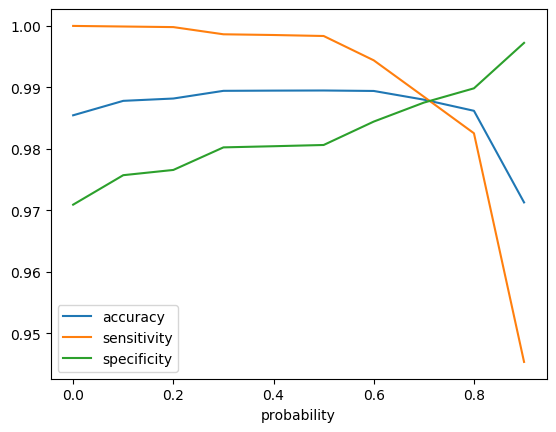

In [121]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(DT_SMT,X_smote, y_smote)

In [122]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(DT_SMT,X_smote, y_smote,X_test,y_test,0.5)

For Training Data:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    198277
           1       0.98      1.00      0.99    198277

    accuracy                           0.99    396554
   macro avg       0.99      0.99      0.99    396554
weighted avg       0.99      0.99      0.99    396554
 

[[194436   3841]
 [   325 197952]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.06      0.77      0.11       142

    accuracy                           0.98     85118
   macro avg       0.53      0.88      0.55     85118
weighted avg       1.00      0.98      0.99     85118
 

[[83264  1712]
 [   32   110]]


For Training Data:
The ROC_AUC_Score:  0.9994217615930769


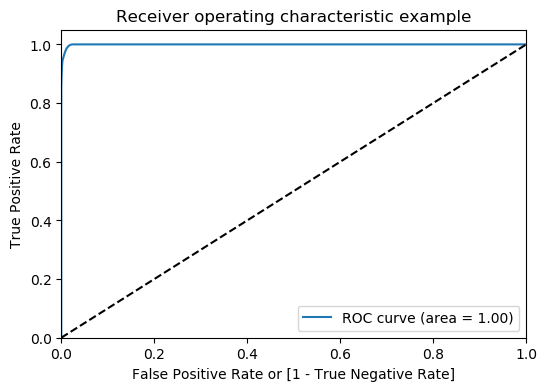



For Testing Data:
The ROC_AUC_Score:  0.8938406966938137


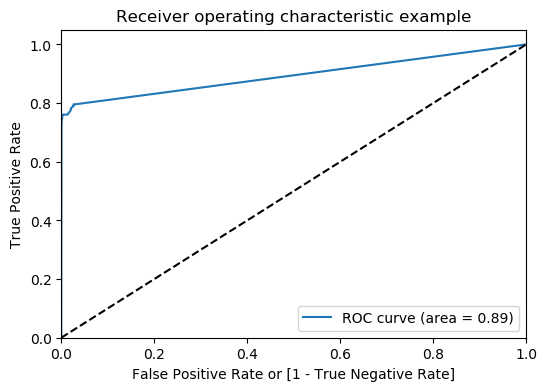

In [123]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_smote.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [124]:
#Printing cross validation result
cross_validate(DT_SMT,X_smote, y_smote)

    fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  17.097779    0.144731      0.998742     0.998008        0.978683  0.988251   
1  18.146698    0.125523      0.998788     0.993519        0.980928  0.987184   
2  16.555438    0.128536      0.998732     0.998084        0.979654  0.988783   
3  17.111962    0.146740      0.998549     0.993746        0.977405  0.985508   
4  17.017467    0.125855      0.998616     0.990594        0.983821  0.987196   

   test_accuracy  
0       0.988135  
1       0.987101  
2       0.988677  
3       0.985387  
4       0.987152  


Avg. values are:



fit_time          17.185869
score_time         0.134277
test_roc_auc       0.998685
test_recall        0.994790
test_precision     0.980098
test_f1            0.987384
test_accuracy      0.987291
dtype: float64


In [125]:
# Printing the test metrics using user defined function
print_model_metrics(y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"Decision Tree on SMOTE Dataset ")

------ 

### Decision Tree on SMOTE Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  Decision Tree on SMOTE Dataset       0.98    0.77  0.89

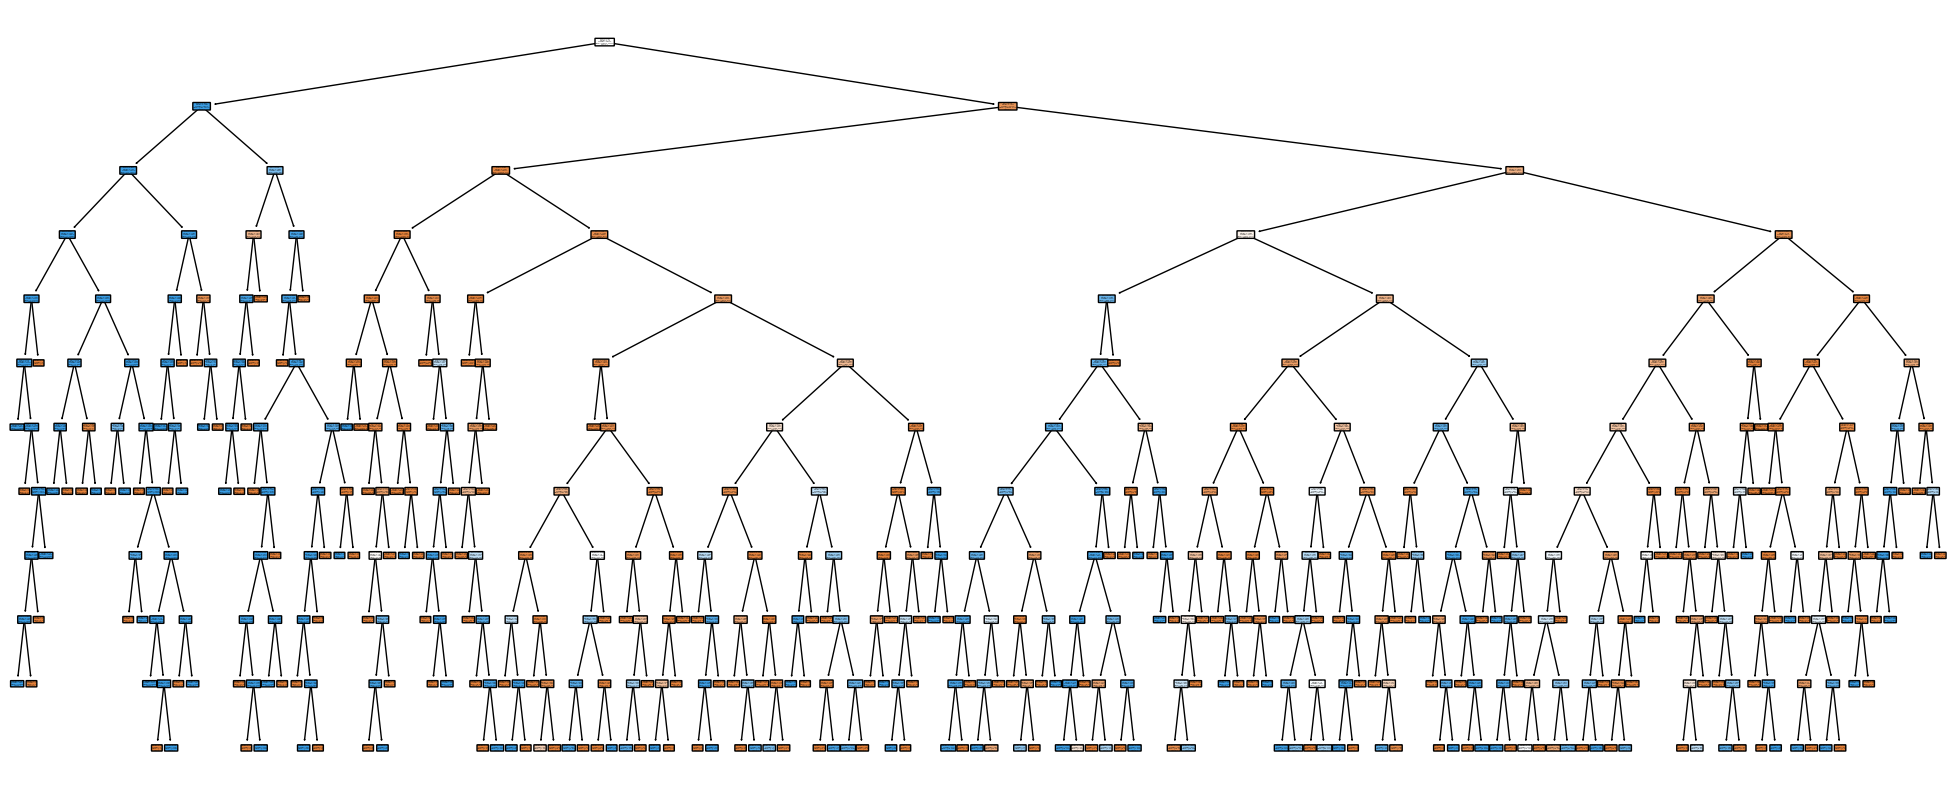

In [126]:
# Visualization of the Decision Tree built
Decision_tree_visual(DT_SMT,y_smote)

### 3.3 Random Forest on SMOTE dataset

In [127]:
# Calling Random Forest function
RF_SMT=Random_Forest(X_smote, y_smote,"SMOTE dataset")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.6min finished


Best accuracy on  SMOTE dataset =  0.9998615979208022
Best parameters :  RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=9,
                       min_samples_split=3, n_estimators=20, oob_score=True,
                       random_state=42, warm_start=True)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.544458     1.000000     0.088916
0.1          0.1  0.950615     1.000000     0.901229
0.2          0.2  0.983576     1.000000     0.967152
0.3          0.3  0.994104     0.999748     0.988461
0.4          0.4  0.996439     0.996666     0.996212
0.5          0.5  0.994432     0.989989     0.998875
0.6          0.6  0.989674     0.979695     0.999652
0.7          0.7  0.979514     0.959143     0.999884
0.8          0.8  0.962663     0.925377     0.999950
0.9          0.9  0.938442     0.876894     0.999990


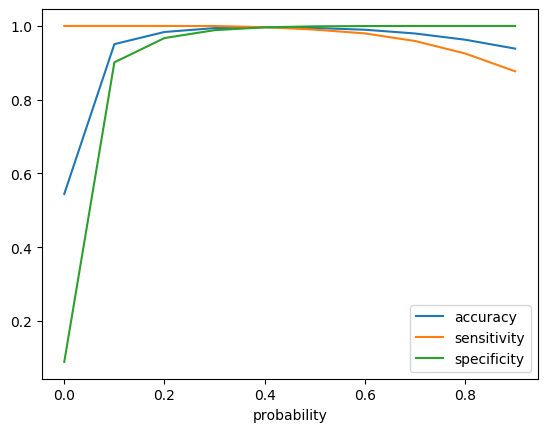

In [128]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(RF_SMT,X_smote, y_smote)

In [129]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(RF_SMT,X_smote, y_smote,X_test,y_test,0.3)

For Training Data:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    198277
           1       0.99      1.00      0.99    198277

    accuracy                           0.99    396554
   macro avg       0.99      0.99      0.99    396554
weighted avg       0.99      0.99      0.99    396554
 

[[195989   2288]
 [    50 198227]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84976
           1       0.11      0.87      0.19       142

    accuracy                           0.99     85118
   macro avg       0.55      0.93      0.59     85118
weighted avg       1.00      0.99      0.99     85118
 

[[83929  1047]
 [   19   123]]


For Training Data:
The ROC_AUC_Score:  0.9999478931410997


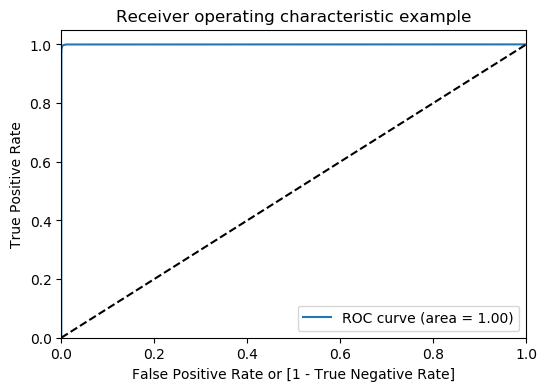



For Testing Data:
The ROC_AUC_Score:  0.9739834163614715


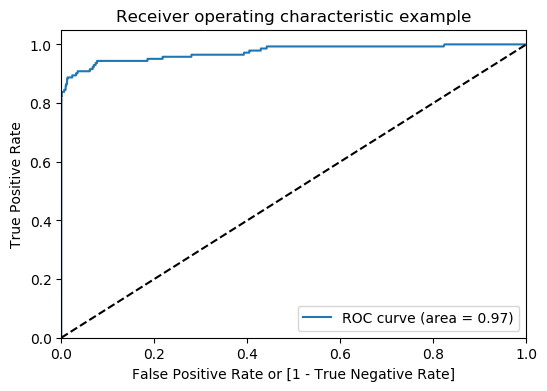

In [130]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_smote.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [131]:
#Printing cross validation result
cross_validate(RF_SMT,X_smote, y_smote)

    fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  50.687427    0.435306      0.999814     0.983104        0.998361  0.990674   
1  47.402200    0.437200      0.999905     0.987820        0.998547  0.993155   
2  46.805414    0.444708      0.999892     0.988249        0.998395  0.993296   
3  45.295576    0.457458      0.999879     0.987039        0.997909  0.992444   
4  42.945900    0.435064      0.999842     0.983382        0.998361  0.990815   

   test_accuracy  
0       0.990745  
1       0.993191  
2       0.993330  
3       0.992485  
4       0.990884  


Avg. values are:



fit_time          46.627303
score_time         0.441947
test_roc_auc       0.999866
test_recall        0.985919
test_precision     0.998315
test_f1            0.992077
test_accuracy      0.992127
dtype: float64


In [132]:
# Printing the metrics using user defined function
print_model_metrics( y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"Random Forest on SMOTE Dataset ")

------ 

### Random Forest on SMOTE Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  Random Forest on SMOTE Dataset       0.99    0.87  0.97

### 3.4 XG Boost on SMOTE dataset

In [133]:
# Calling XGBoost function
XGB_SMT = XGBoost_classifier(X_smote, y_smote,'SMOTE dataset')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.9min finished


Best accuracy on  SMOTE dataset =  0.9884027735439957
Best parameters :  XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='weight', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None,
              max_depth=59.94842503189409, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=None, random_state=42, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=1, subsample=None,
              tree_method=None, validate_parameters=1, verbosity=0)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.883781     0.984441     0.783122
0.2          0.2  0.934183     0.968680     0.899686
0.3          0.3  0.947087     0.953035     0.941138
0.4          0.4  0.948249     0.935701     0.960797
0.5          0.5  0.946887     0.920682     0.973093
0.6          0.6  0.944560     0.907397     0.981723
0.7          0.7  0.940999     0.894582     0.987417
0.8          0.8  0.936604     0.881706     0.991502
0.9          0.9  0.926320     0.857114     0.995526


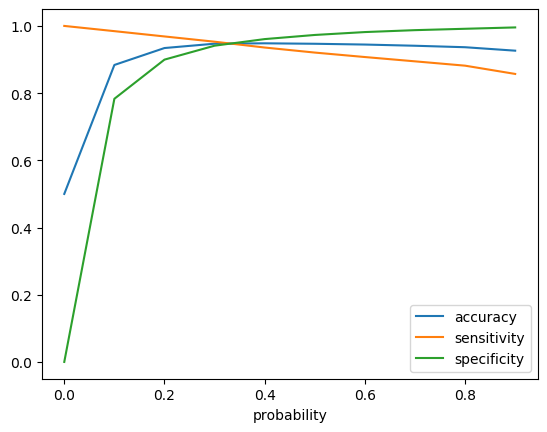

In [134]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(XGB_SMT,X_smote, y_smote)

In [135]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(XGB_SMT,X_smote, y_smote,X_test,y_test,0.1)

For Training Data:

              precision    recall  f1-score   support

           0       0.98      0.78      0.87    198277
           1       0.82      0.98      0.89    198277

    accuracy                           0.88    396554
   macro avg       0.90      0.88      0.88    396554
weighted avg       0.90      0.88      0.88    396554
 

[[155275  43002]
 [  3085 195192]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     84976
           1       0.01      0.96      0.01       142

    accuracy                           0.79     85118
   macro avg       0.50      0.87      0.45     85118
weighted avg       1.00      0.79      0.88     85118
 

[[66758 18218]
 [    6   136]]


For Training Data:
The ROC_AUC_Score:  0.9884127774510721


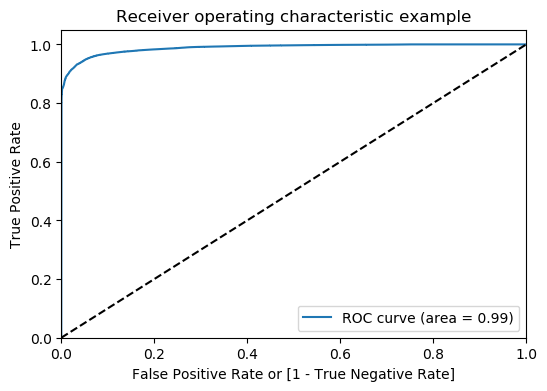



For Testing Data:
The ROC_AUC_Score:  0.9680478962079766


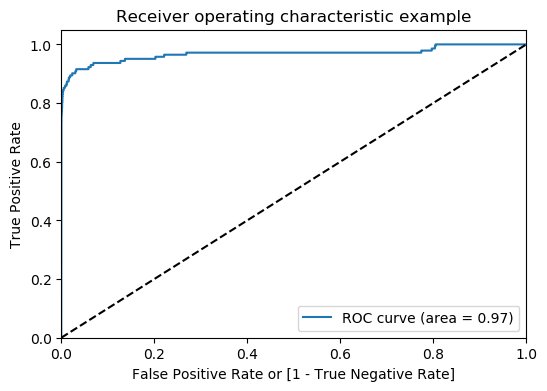

In [136]:
# Roc curve for the training dataset
draw_roc("For Training Data:",y_smote.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [137]:
#Printing cross validation result
cross_validate(XGB_SMT,X_smote, y_smote)

   fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  8.738603    0.440287      0.988845     0.921851        0.971717  0.946127   
1  8.849465    0.463730      0.988414     0.920439        0.971649  0.945351   
2  6.466066    0.432382      0.988230     0.921349        0.971574  0.945795   
3  6.551707    0.422945      0.988033     0.921349        0.970593  0.945330   
4  6.509237    0.432347      0.988485     0.918220        0.972153  0.944417   

   test_accuracy  
0       0.947510  
1       0.946792  
2       0.947195  
3       0.946716  
4       0.945959  


Avg. values are:



fit_time          7.423015
score_time        0.438338
test_roc_auc      0.988402
test_recall       0.920641
test_precision    0.971537
test_f1           0.945404
test_accuracy     0.946834
dtype: float64


In [138]:
# Printing the metrics using user defined function
print_model_metrics( y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"XGBoost on SMOTE Dataset ")

------ 

### XGBoost on SMOTE Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  XGBoost on SMOTE Dataset       0.79    0.96  0.97

### 4  ADASYN

In [139]:
# Initial structure
print(100*y_train.value_counts()/len(y_train))
print("Length of X_train ",len(X_train))

0    99.83334
1     0.16666
Name: Class, dtype: float64
Length of X_train  198608


#### Use Adasyn technique and visualizing the class distribution after applying ADASYN

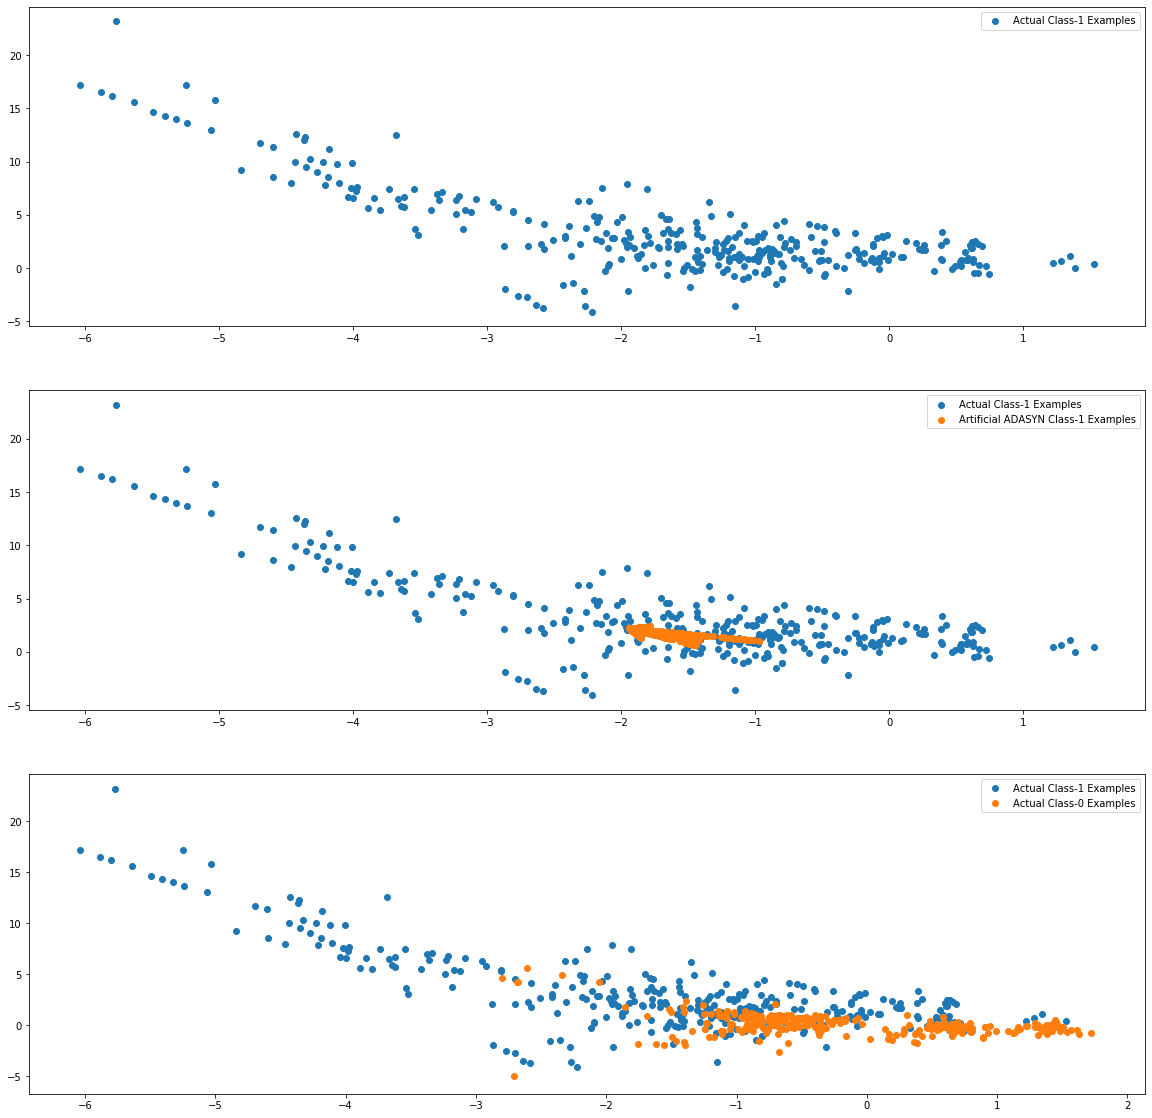

In [140]:
# Performing ADASYN technique to balnce the imbalanced dataset
ada = ADASYN(random_state=42)
X_ADSN, y_ADSN = ada.fit_resample(X_train, y_train.reset_index(drop=True))

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_ADSN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


# Printing the distribution of labels after performing ADASYN technique
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [141]:
#Structure after sampling
print(100*y_ADSN.value_counts()/len(y_ADSN))
print(len(X_ADSN))

0    50.005296
1    49.994704
Name: Class, dtype: float64
396512


In [142]:
#Stratified structure
from sklearn.model_selection import StratifiedKFold
stratkfold = StratifiedKFold(n_splits=cv_num, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
count=1
for train_ix, test_ix in stratkfold.split(X_ADSN,y_ADSN):
    # select rows
    print('Fold Number:',count)
    print(train_ix,test_ix)
    X_train_cv, X_test_cv = X_ADSN.iloc[list(train_ix)], X_ADSN.iloc[list(test_ix)]
    y_train_cv, y_test_cv = y_ADSN.iloc[list(train_ix)], y_ADSN.iloc[list(test_ix)]
    # summarize train and test composition
    train_0, train_1 = len(y_train_cv[y_train_cv==0]), len(y_train_cv[y_train_cv==1])
    test_0, test_1 = len(y_test_cv[y_test_cv==0]), len(y_test_cv[y_test_cv==1])
    print('>Train: 0=%d, 1=%d\n>Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    print('\n')
    count+=1

Fold Number: 1
[     0      1      2 ... 396509 396510 396511] [     3     10     12 ... 396491 396499 396501]
>Train: 0=158621, 1=158588
>Test: 0=39656, 1=39647


Fold Number: 2
[     0      2      3 ... 396505 396506 396510] [     1      5      7 ... 396508 396509 396511]
>Train: 0=158621, 1=158588
>Test: 0=39656, 1=39647


Fold Number: 3
[     0      1      2 ... 396509 396510 396511] [     4     13     17 ... 396498 396500 396502]
>Train: 0=158622, 1=158588
>Test: 0=39655, 1=39647


Fold Number: 4
[     1      3      4 ... 396509 396510 396511] [     0      2      6 ... 396486 396503 396505]
>Train: 0=158622, 1=158588
>Test: 0=39655, 1=39647


Fold Number: 5
[     0      1      2 ... 396508 396509 396511] [     8     22     29 ... 396504 396506 396510]
>Train: 0=158622, 1=158588
>Test: 0=39655, 1=39647




### 4.1 Logistic Regression on ADASYN dataset

In [143]:
# Calling the Logistic Regression Function for imbalanced dataset
LR_ADSN = Logistic_Regression(X_ADSN, y_ADSN,"ADASYN dataset")

Best parameters found for Logistic Regression with ADASYN dataset :  {'penalty': 'l2', 'C': 1291.5496650148827}


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.499947     1.000000     0.000000
0.1          0.1  0.782824     0.990410     0.575281
0.2          0.2  0.848239     0.978430     0.718076
0.3          0.3  0.888044     0.958020     0.818083
0.4          0.4  0.895153     0.912296     0.878014
0.5          0.5  0.893365     0.873413     0.913313
0.6          0.6  0.885353     0.833642     0.937053
0.7          0.7  0.862229     0.770838     0.953600
0.8          0.8  0.841236     0.713915     0.968529
0.9          0.9  0.801653     0.621066     0.982202


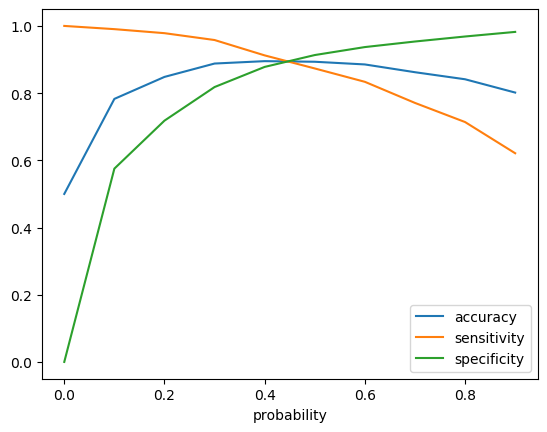

In [144]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(LR_ADSN,X_ADSN, y_ADSN)

In [145]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(LR_ADSN,X_ADSN, y_ADSN,X_test,y_test,0.1)

For Training Data:

              precision    recall  f1-score   support

           0       0.98      0.58      0.73    198277
           1       0.70      0.99      0.82    198235

    accuracy                           0.78    396512
   macro avg       0.84      0.78      0.77    396512
weighted avg       0.84      0.78      0.77    396512
 

[[114065  84212]
 [  1901 196334]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      0.58      0.73     84976
           1       0.00      0.97      0.01       142

    accuracy                           0.58     85118
   macro avg       0.50      0.77      0.37     85118
weighted avg       1.00      0.58      0.73     85118
 

[[49000 35976]
 [    4   138]]


For Training Data:
The ROC_AUC_Score:  0.9627257495353139


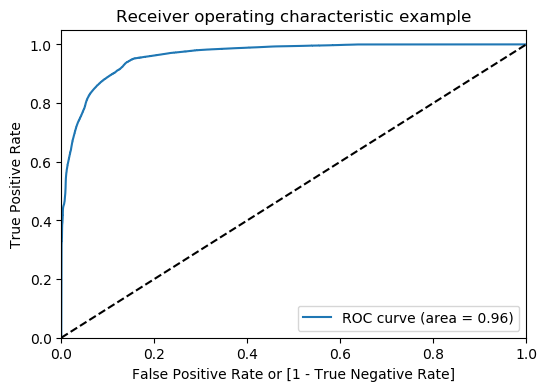



For Testing Data:
The ROC_AUC_Score:  0.9657706169231545


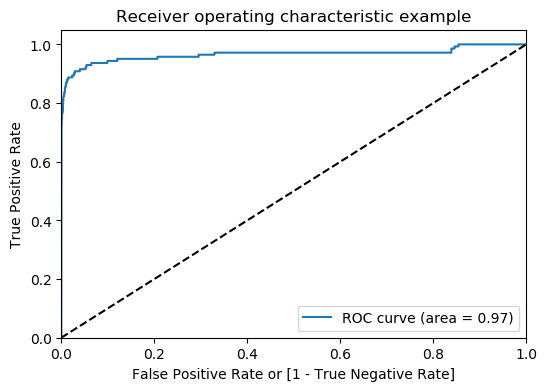

In [146]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_ADSN.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [147]:
#Printing cross validation result
cross_validate(LR_ADSN,X_ADSN, y_ADSN)

     fit_time  score_time  test_roc_auc  test_recall  test_precision  \
0  180.355103    0.151527      0.928594     0.742503        0.902148   
1  177.280600    0.128759      0.963318     0.873559        0.909650   
2  226.805466    0.131287      0.966895     0.920927        0.907153   
3  222.446667    0.128884      0.934241     0.758670        0.902135   
4  193.691616    0.131195      0.927617     0.799884        0.900375   

    test_f1  test_accuracy  
0  0.814577       0.831003  
1  0.891239       0.893409  
2  0.913988       0.913344  
3  0.824206       0.838201  
4  0.847160       0.855704  


Avg. values are:



fit_time          200.115890
score_time          0.134330
test_roc_auc        0.944133
test_recall         0.819109
test_precision      0.904292
test_f1             0.858234
test_accuracy       0.866332
dtype: float64


In [148]:
# Printing the metrics using user defined function
print_model_metrics(y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"Logistic on ADASYN Dataset ")

------ 

### Logistic on ADASYN Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  Logistic on ADASYN Dataset       0.58    0.97  0.97

### 4.2  Decision Tree on ADASYN dataset

In [149]:
# Calling the Logistic Regression Function for imbalanced dataset
DT_ADSN = Decision_tree(X_ADSN, y_ADSN,"ADASYN Dataset")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


Best accuracy on  ADASYN Dataset  =  0.9946688467317588
Best parameters :  DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=9,
                       min_samples_split=7, random_state=42)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.926317     1.000000     0.852651
0.1          0.1  0.966074     0.999334     0.932821
0.2          0.2  0.970861     0.998083     0.943644
0.3          0.3  0.977675     0.991288     0.964065
0.4          0.4  0.977713     0.991212     0.964217
0.5          0.5  0.977723     0.991132     0.964318
0.6          0.6  0.977711     0.991006     0.964418
0.7          0.7  0.975015     0.981033     0.968998
0.8          0.8  0.974745     0.980256     0.969235
0.9          0.9  0.939825     0.897934     0.981707


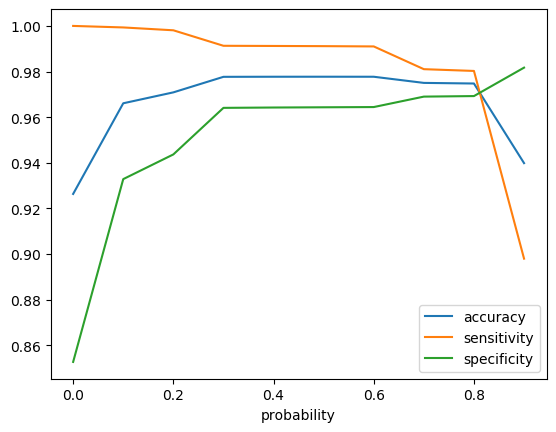

In [150]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(DT_ADSN,X_ADSN, y_ADSN)

In [151]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(DT_ADSN,X_ADSN, y_ADSN,X_test,y_test,0.6)

For Training Data:

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    198277
           1       0.97      0.99      0.98    198235

    accuracy                           0.98    396512
   macro avg       0.98      0.98      0.98    396512
weighted avg       0.98      0.98      0.98    396512
 

[[191222   7055]
 [  1783 196452]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84976
           1       0.04      0.82      0.07       142

    accuracy                           0.96     85118
   macro avg       0.52      0.89      0.53     85118
weighted avg       1.00      0.96      0.98     85118
 

[[81897  3079]
 [   26   116]]


For Training Data:
The ROC_AUC_Score:  0.9946225037396441


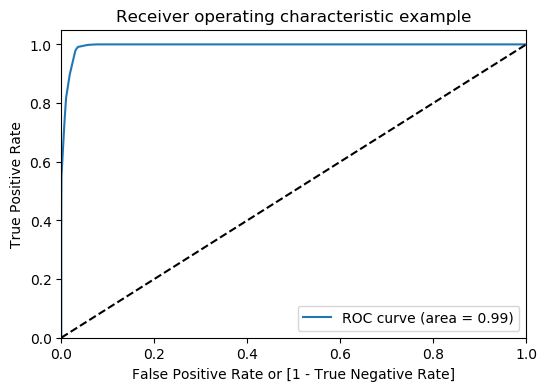



For Testing Data:
The ROC_AUC_Score:  0.916018748292807


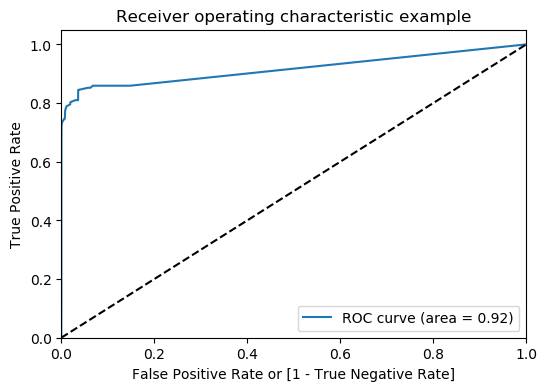

In [152]:
# Roc curve for the training dataset
draw_roc("For Training Data:",y_ADSN.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [153]:
#Printing cross validation result
cross_validate(DT_ADSN,X_ADSN, y_ADSN)

    fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  19.473400    0.129587      0.894454     0.803667        0.961554  0.875550   
1  18.640141    0.121487      0.948781     0.900800        0.965061  0.931824   
2  19.152400    0.158987      0.957579     0.920398        0.962976  0.941205   
3  19.420226    0.199455      0.925651     0.856307        0.967622  0.908568   
4  18.387718    0.129450      0.906557     0.753449        0.959373  0.844033   

   test_accuracy  
0       0.885780  
1       0.934101  
2       0.942511  
3       0.913836  
4       0.860785  


Avg. values are:



fit_time          19.014777
score_time         0.147793
test_roc_auc       0.926604
test_recall        0.846924
test_precision     0.963317
test_f1            0.900236
test_accuracy      0.907403
dtype: float64


In [154]:
# Printing the metrics using user defined function
print_model_metrics(y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"Decision Tree on ADASYN Dataset ")

------ 

### Decision Tree on ADASYN Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  Decision Tree on ADASYN Dataset       0.96    0.82  0.92

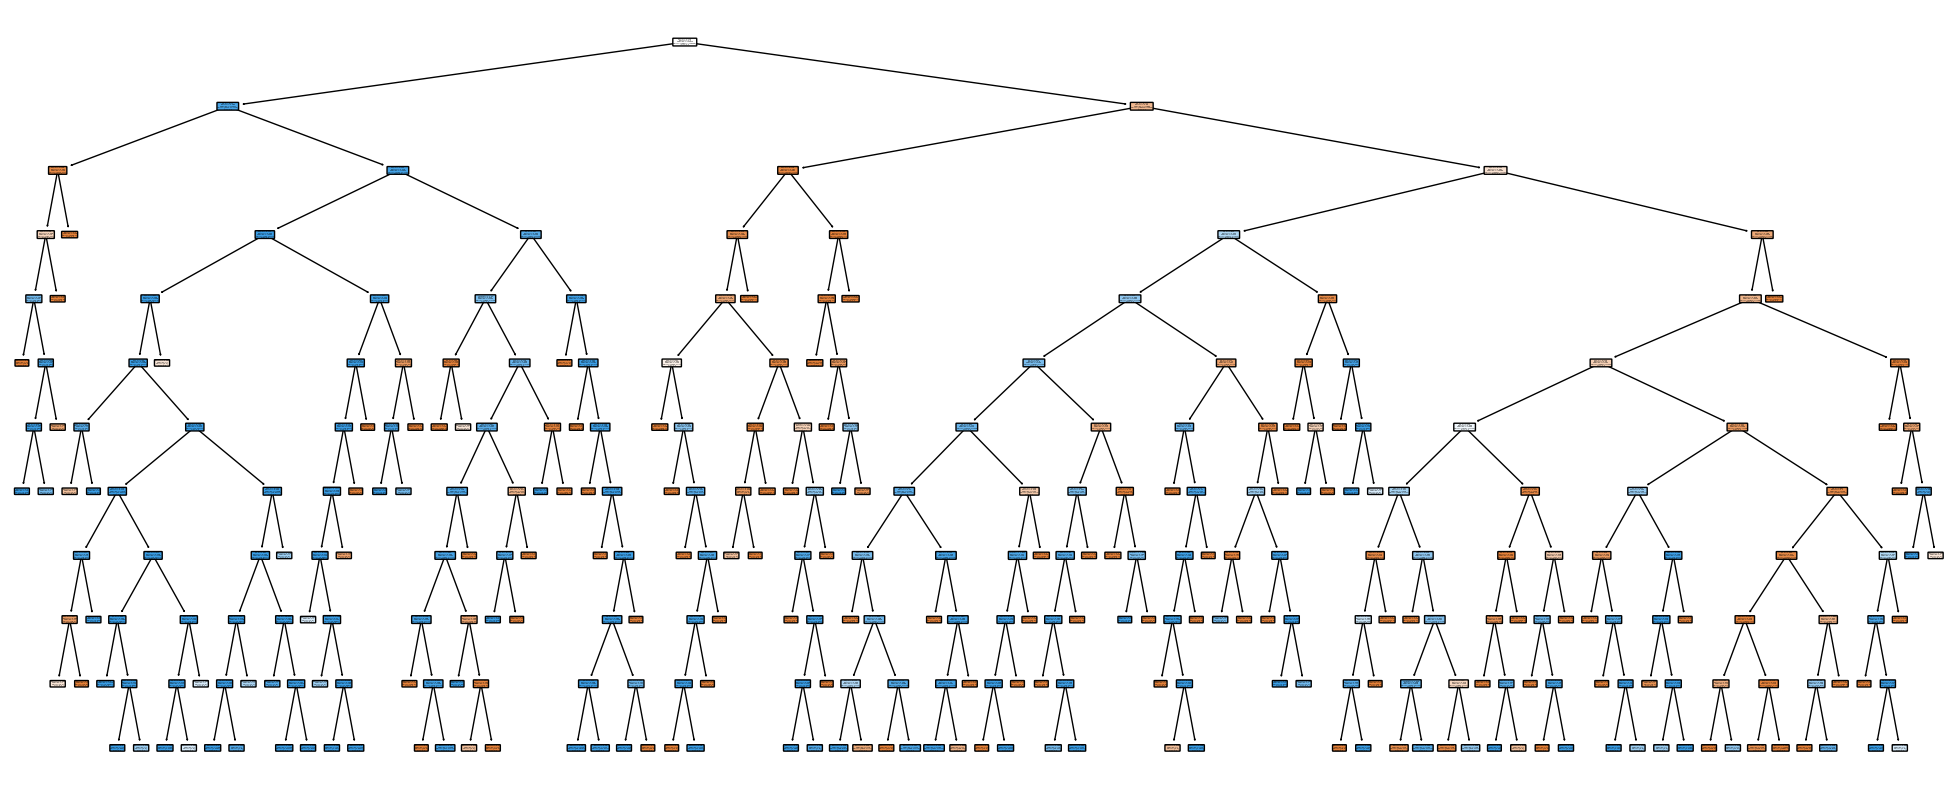

In [155]:
# Visualization of the Decision Tree built
Decision_tree_visual(DT_ADSN,y_ADSN)

### 4.3  Random Forest on ADASYN dataset

In [156]:
# Calling Random Forest function
RF_ADSN=Random_Forest(X_ADSN, y_ADSN,"ADASYN dataset")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.4min finished


Best accuracy on  ADASYN dataset =  0.9998138660548223
Best parameters :  RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=7,
                       min_samples_split=3, n_estimators=20, oob_score=True,
                       random_state=42, warm_start=True)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.565960     1.000000     0.132012
0.1          0.1  0.895877     1.000000     0.791776
0.2          0.2  0.955792     1.000000     0.911593
0.3          0.3  0.979236     1.000000     0.958477
0.4          0.4  0.990290     1.000000     0.980583
0.5          0.5  0.995579     0.999349     0.991809
0.6          0.6  0.996230     0.995667     0.996792
0.7          0.7  0.990555     0.982344     0.998764
0.8          0.8  0.960102     0.920418     0.999778
0.9          0.9  0.878208     0.756420     0.999970


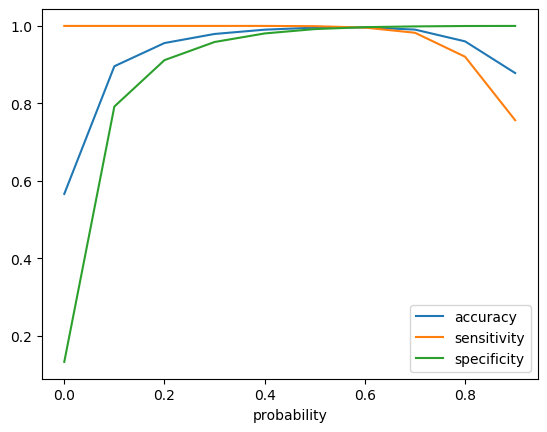

In [157]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(RF_ADSN,X_ADSN, y_ADSN)

In [158]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(RF_ADSN,X_ADSN, y_ADSN,X_test,y_test,0.5)

For Training Data:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    198277
           1       0.99      1.00      1.00    198235

    accuracy                           1.00    396512
   macro avg       1.00      1.00      1.00    396512
weighted avg       1.00      1.00      1.00    396512
 

[[196653   1624]
 [   129 198106]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.14      0.86      0.24       142

    accuracy                           0.99     85118
   macro avg       0.57      0.93      0.62     85118
weighted avg       1.00      0.99      0.99     85118
 

[[84244   732]
 [   20   122]]


For Training Data:
The ROC_AUC_Score:  0.9998900226309749


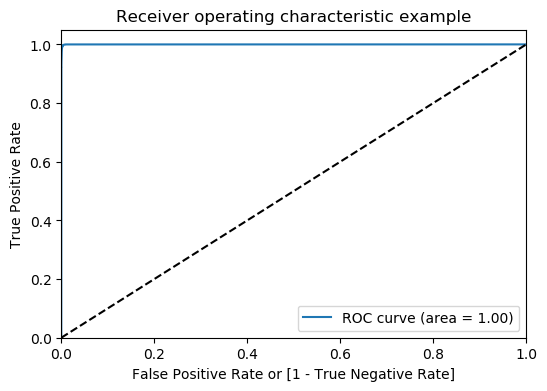



For Testing Data:
The ROC_AUC_Score:  0.962337087389712


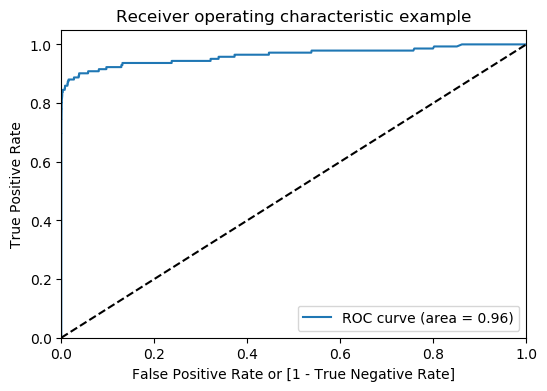

In [159]:
# Roc curve for the training dataset
draw_roc("For Training Data:",y_ADSN.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [160]:
#Printing cross validation result
cross_validate(RF_ADSN,X_ADSN, y_ADSN)

    fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  46.601625    0.455623      0.986169     0.747446        0.989185  0.851491   
1  54.222169    0.458699      0.995222     0.887003        0.992017  0.936575   
2  46.285746    0.426779      0.997191     0.939718        0.990509  0.964445   
3  47.856049    0.484947      0.978469     0.870532        0.993180  0.927821   
4  45.274079    0.415102      0.968195     0.769163        0.986989  0.864567   

   test_accuracy  
0       0.869652  
1       0.939939  
2       0.965360  
3       0.932284  
4       0.879524  


Avg. values are:



fit_time          48.047933
score_time         0.448230
test_roc_auc       0.985049
test_recall        0.842772
test_precision     0.990376
test_f1            0.908980
test_accuracy      0.917352
dtype: float64


In [161]:
# Printing the metrics using user defined function
print_model_metrics( y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"Random Forest on ADASYN Dataset ")

------ 

### Random Forest on ADASYN Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  Random Forest on ADASYN Dataset       0.99    0.86  0.96

### 4.4 XG Boost on ADASYN dataset

In [162]:
# Calling XGBoost function
XGB_ADSN = XGBoost_classifier(X_ADSN, y_ADSN,'ADASYN dataset')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.9min finished


Best accuracy on  ADASYN dataset =  0.9617957365908386
Best parameters :  XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='cover', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None,
              max_depth=3593.813663804626, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=None, random_state=42, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=1, subsample=None,
              tree_method=None, validate_parameters=1, verbosity=0)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.499947     1.000000     0.000000
0.1          0.1  0.773931     0.992206     0.555702
0.2          0.2  0.843205     0.979842     0.706597
0.3          0.3  0.886268     0.957898     0.814653
0.4          0.4  0.894387     0.913744     0.875033
0.5          0.5  0.892293     0.872843     0.911740
0.6          0.6  0.881444     0.825722     0.937154
0.7          0.7  0.858700     0.763437     0.953943
0.8          0.8  0.836895     0.704462     0.969301
0.9          0.9  0.798087     0.613050     0.983084


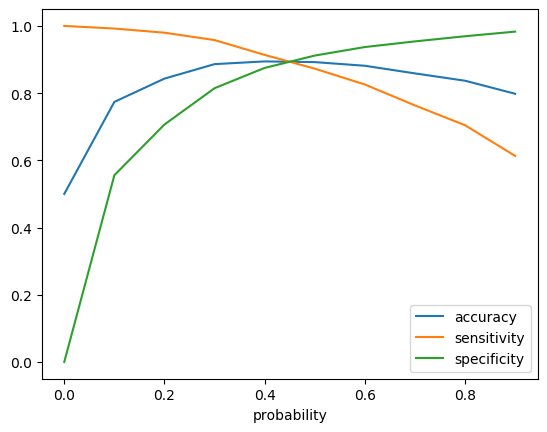

In [163]:
# Finding the best probability value for the Logistic Regression model we built
probability_cutoffs(XGB_ADSN,X_ADSN, y_ADSN)

In [164]:
# Tuning the threshold value for balanced sensitivity,specificity and accuracy
train_pred_y=pd.DataFrame()
test_pred_y=pd.DataFrame()
train_pred_y['train_proba'],train_pred_y['train_pred'],test_pred_y['test_proba'],test_pred_y['test_pred'] = Tuning_Threshold(XGB_ADSN,X_ADSN, y_ADSN,X_test,y_test,0.1)

For Training Data:

              precision    recall  f1-score   support

           0       0.99      0.56      0.71    198277
           1       0.69      0.99      0.81    198235

    accuracy                           0.77    396512
   macro avg       0.84      0.77      0.76    396512
weighted avg       0.84      0.77      0.76    396512
 

[[110183  88094]
 [  1545 196690]]


For Testing Data:

              precision    recall  f1-score   support

           0       1.00      0.56      0.71     84976
           1       0.00      0.97      0.01       142

    accuracy                           0.56     85118
   macro avg       0.50      0.76      0.36     85118
weighted avg       1.00      0.56      0.71     85118
 

[[47232 37744]
 [    4   138]]


For Training Data:
The ROC_AUC_Score:  0.9618102018274781


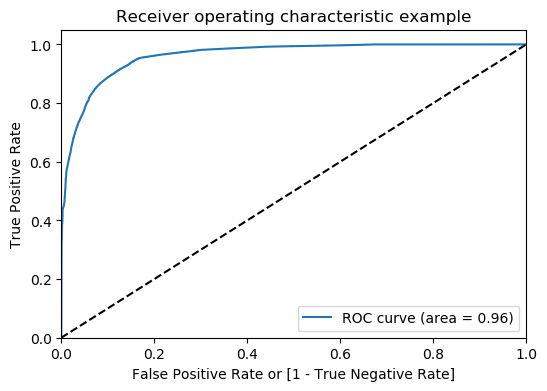



For Testing Data:
The ROC_AUC_Score:  0.9655611957377859


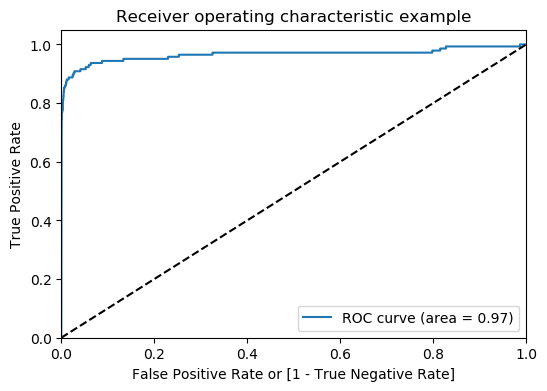

In [165]:
# Roc curve for the training and testing dataset
draw_roc("For Training Data:",y_ADSN.values,train_pred_y['train_proba'])
print('\n')
draw_roc("For Testing Data:",y_test.values,test_pred_y['test_proba'])

In [166]:
#Printing cross validation result
cross_validate(XGB_ADSN,X_ADSN, y_ADSN)

   fit_time  score_time  test_roc_auc  test_recall  test_precision   test_f1  \
0  8.618484    0.444016      0.925481     0.739854        0.902027  0.812931   
1  7.765558    0.432642      0.961400     0.869473        0.908760  0.888683   
2  6.479721    0.432781      0.968361     0.919817        0.905925  0.912818   
3  6.520790    0.432733      0.936233     0.739425        0.897200  0.810708   
4  7.397482    0.442765      0.926836     0.796782        0.898107  0.844415   

   test_accuracy  
0       0.829767  
1       0.891101  
2       0.912159  
3       0.827369  
4       0.853207  


Avg. values are:



fit_time          7.356407
score_time        0.436987
test_roc_auc      0.943662
test_recall       0.813070
test_precision    0.902404
test_f1           0.853911
test_accuracy     0.862720
dtype: float64


In [167]:
# Printing the test metrics using user defined function
print_model_metrics( y_test, test_pred_y['test_pred'],test_pred_y['test_proba'],"XGBoost on ADASYN Dataset ")

------ 

### XGBoost on ADASYN Dataset  Model Stats Scores Summary : 

Model  Accuracy  Recall   AUC
0  XGBoost on ADASYN Dataset       0.56    0.97  0.97

In [168]:
# Metrics for all the models built
consolidate_summary.sort_values(by=['AUC','Recall'],ascending=False)

Model  Accuracy  Recall   AUC
2             Random Forest on imbalanced Dataset       1.00    0.80  0.98
0                  Logistic on Imbalanced Dataset       1.00    0.75  0.98
3                   XGBoost on imbalanced Dataset       1.00    0.75  0.98
13                     Logistic on ADASYN Dataset       0.58    0.97  0.97
16                      XGBoost on ADASYN Dataset       0.56    0.97  0.97
5        Logistic on Random Over Sampling Dataset       0.79    0.96  0.97
8         XGBoost on Random Over Sampling Dataset       0.79    0.96  0.97
9                       Logistic on SMOTE Dataset       0.79    0.96  0.97
12                       XGBoost on SMOTE Dataset       0.79    0.96  0.97
11                 Random Forest on SMOTE Dataset       0.99    0.87  0.97
15                Random Forest on ADASYN Dataset       0.99    0.86  0.96
7   Random Forest on Random Over Sampling Dataset       1.00    0.74  0.96
14                Decision Tree on ADASYN Dataset       0.96    0.82  0.92
1             Decision Tree on imbalanced Dataset       1.00    0.79  0.91
6   Decision Tree on Random Over Sampling Dataset       1.00    0.77  0.89
10                 Decision Tree on SMOTE Dataset       0.98    0.77  0.89
4                       SVM on imbalanced dataset       1.00    0.76  0.88

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


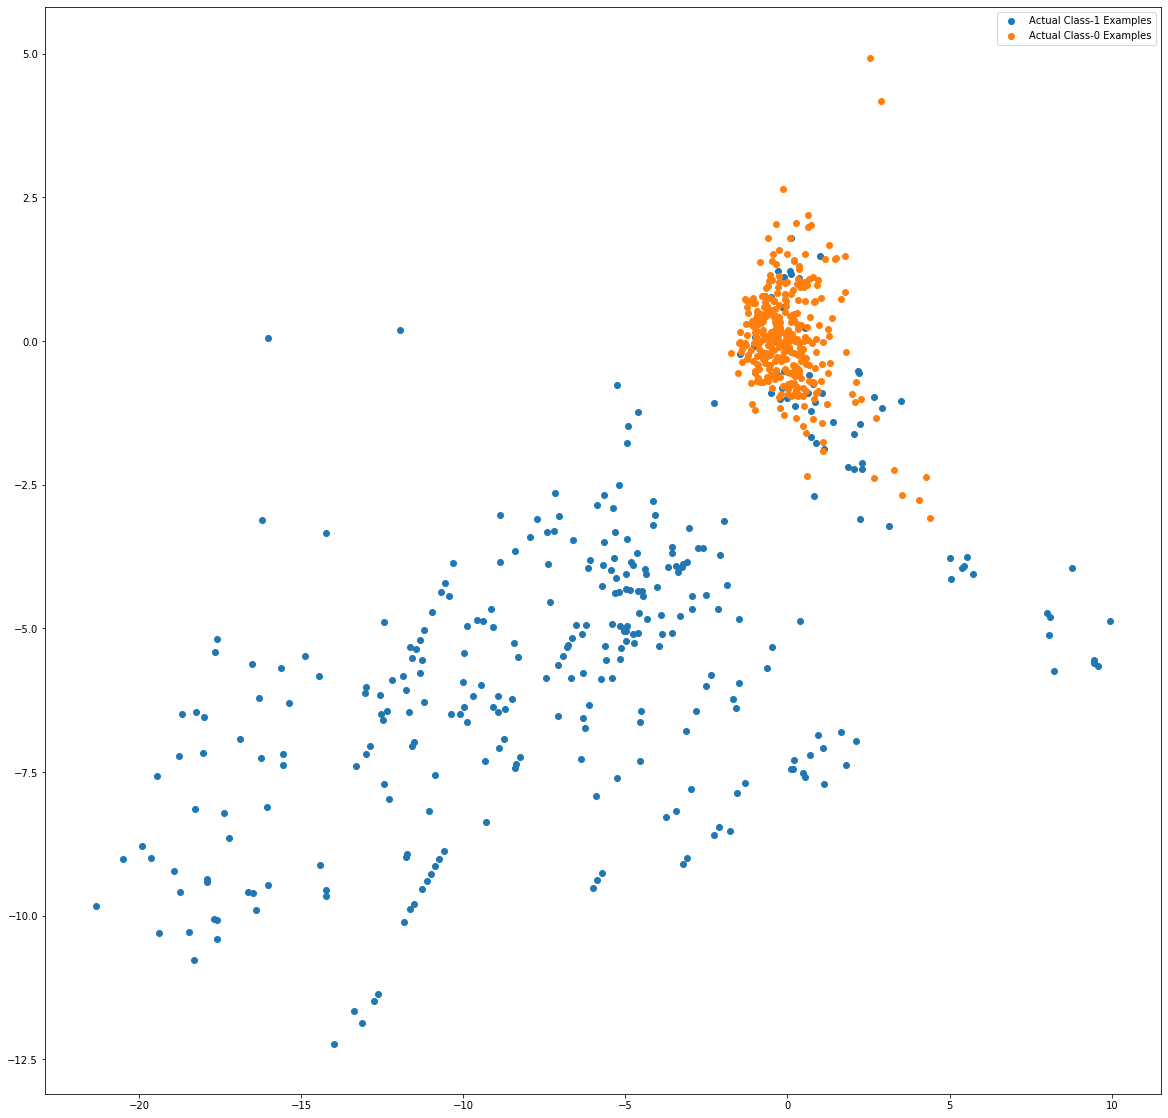

In [169]:
var_imp = []
for i in DT_IMB.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(DT_IMB.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(DT_IMB.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(DT_IMB.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(DT_IMB.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(DT_IMB.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [170]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_train.values,DT_IMB.predict_proba(X_train)[:,1]))
fpr,tpr,thresholds = metrics.roc_curve(y_train.values,DT_IMB.predict_proba(X_train)[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9945130775955096
0.006887052341597796


# Summary

#### We started by importing the dataset, then removing duplicate records, taking care of skewness.
#### Then we did an EDA on the dataset to get a brief understanding of the variables.
#### We then divided the modelling process into 3 parts:
    -1] Modelling on Imbalanced data: Here we use Logistic Regression, Decision Trees, Random Forest, XGBoost and SVM
    -2] Modelling on RandomOversampled data: Here we use Logistic Regression, Decision Trees, Random Forest, XGBoost
    -3] Modelling on SMOTEOversampled data: Here we use Logistic Regression, Decision Trees, Random Forest, XGBoost
    -4] Modelling on ADASYNOversampled data: Here we use Logistic Regression, Decision Trees, Random Forest, XGBoost
#### In each of these above processess we do: 
    - Removed unnecessary columns.
    - Stratified train-test split.
    - The required sampling technique. 
    - Use 3 folds and do cross validated Randomized hyperparameter tuning to get best parameters in terms of best roc-auc scoring.
    - Train model on the best parameters.
    - Find the best cut-off probability threshold for our model for prediction.
    - Cross validate the model to check over fitting
    - Conduct model evaluation for metrics like recall, precision,roc-auc,etc. on both training and testing data
    - Finally we keep the track of all model performances throughout the script. 
#### After looking at the performance metrics and checking the bias and variance we can say:
#### In imbalance dataset our top performing models are Logistic Regression, Random forests, XGBoost.
#### In RandomOversampled balanced data our top performing models are Logistic Regression, XGBoost.
#### In SMOTEOversampled balanced data our top performing models are Logistic Regression, XGBoost.
#### In ADASYNOversampled balanced data our top performing models are Logistic Regression, XGBoost.

# END